In [1]:
pip install missingno


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_profiling


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport
from pathlib import Path
from sklearn.metrics import mean_squared_error
from scipy import stats
from yellowbrick.model_selection import FeatureImportances
import shap
import joblib
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/var/folders/sd/m8tnvr3932n71yljx3bl78lr0000gn/T/ipykernel_21558/3769834664

In [6]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

In [7]:
train_original.shape

(30000, 23)

In [8]:
test_original.shape

(20000, 23)

In [9]:
train_original.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property ID', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [10]:
test_original.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [11]:
pd.set_option('display.max_columns', None)
train_original.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Current Loan Expenses (USD)  \
0    Working            Sales staff  Semi-Urban                       241.08   
1    Working                    NaN  Semi-Urban                       495.81   
2  Pensioner                    NaN  Semi-Urban                       171.95   
3  Pensioner                    NaN       Rural                       298.54   
4    Working  High skill tech staff  Semi-Urban                       491.41   

  Expense Type 1 Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N              N         3.0        809.44                0   
1              N              Y         1.0        780.40                0   
2              N              Y         1.0        833.15                0   
3              N              Y         2.0        832.70                1   
4              N              Y         NaN        745.55                1   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0                    NaN          746       1933.05              4   
1            Unpossessed          608       4952.91              2   
2            Unpossessed          546        988.19              2   
3            Unpossessed          890           NaN              2   
4                 Active          715       2614.77              4   

  Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             Rural             1       119933.46                    54607.18  
1             Rural             1        54791.00                    37469.98  
2             Urban             0        72440.58                    36474.43  
3        Semi-Urban             1       121441.51                    56040.54  
4        Semi-Urban             1       208567.91                    74008.28

In [12]:
test_original.head()

Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   
3     C-16668      Elva Sackett      M   65       1369.72             High   
4     C-12196    Sade Constable      F   60       1939.23             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  137088.98                       396.72              N   
1                  104771.59                       463.76              Y   
2                  176684.91                       493.15              N   
3                   97009.18                       446.15              N   
4                  109980.00                       370.10              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N         2.0        799.14                0   
1              Y         2.0        833.31                0   
2              Y         3.0        627.44                0   
3              Y         2.0        833.20                0   
4              N         NaN           NaN                0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0            Unpossessed          843       3472.69              2   
1            Unpossessed           22       1184.84              1   
2            Unpossessed            1       1266.27              1   
3               Inactive          730       1369.72              1   
4                    NaN          356       1939.23              4   

  Property Location Co-Applicant Property Price  
0             Urban            1       236644.5  
1             Rural            1       142357.3  
2             Urban            1      300991.24  
3        Semi-Urban            0       125612.1  
4        Semi-Urban            1       180908.0

In [13]:
full_data = train_original

In [14]:
full_data.shape

(30000, 23)

In [15]:
# split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [16]:
loan_amt_train_original, loan_amt_test_original = data_split(full_data, 0.2)

In [17]:
loan_amt_train_copy, loan_amt_test_copy = loan_amt_train_original.copy(), loan_amt_test_original.copy()

In [18]:
loan_amt_train_copy.shape

(24000, 23)

In [19]:

loan_amt_test_copy.shape

(6000, 23)

In [20]:
loan_amt_train_copy.head()

Customer ID            Name Gender  Age  Income (USD) Income Stability  \
0     C-15808  Minerva Dundon      M   27      12398.65              Low   
1     C-29367  Darius Granado      M   36           NaN              Low   
2     C-20386   Verlene Hagar      M   52           NaN              Low   
3     C-14237    Yang Leitner      F   18           NaN              Low   
4     C-14759   Ilda Jeffords      F   18       2203.52              Low   

             Profession Type of Employment    Location  \
0               Working           Managers       Urban   
1               Working                NaN  Semi-Urban   
2  Commercial associate        Sales staff  Semi-Urban   
3               Working           Laborers       Rural   
4               Working           Laborers  Semi-Urban   

   Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                      1255.89              Y              N         2.0   
1                       500.43              N              N         1.0   
2                       539.09              N              Y         1.0   
3                       168.21              N              N         2.0   
4                       681.95              N              Y         2.0   

   Credit Score  No. of Defaults Has Active Credit Card  Property ID  \
0           NaN                0                 Active          540   
1        646.05                1                    NaN          320   
2        706.42                0                 Active            6   
3        640.23                0            Unpossessed          869   
4        835.55                0               Inactive           21   

   Property Age  Property Type Property Location  Co-Applicant  \
0      12398.65              4        Semi-Urban             1   
1           NaN              3             Urban             1   
2           NaN              2             Rural             1   
3           NaN              2             Urban             1   
4       2203.52              3             Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       526542.91                   235683.91  
1       250293.24                        0.00  
2       157866.23                    72999.90  
3        30470.51                        0.00  
4       142224.12                    57256.53

In [21]:
loan_amt_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  24000 non-null  object 
 1   Name                         24000 non-null  object 
 2   Gender                       23954 non-null  object 
 3   Age                          24000 non-null  int64  
 4   Income (USD)                 20352 non-null  float64
 5   Income Stability             22676 non-null  object 
 6   Profession                   24000 non-null  object 
 7   Type of Employment           18228 non-null  object 
 8   Location                     24000 non-null  object 
 9   Current Loan Expenses (USD)  23872 non-null  float64
 10  Expense Type 1               24000 non-null  object 
 11  Expense Type 2               24000 non-null  object 
 12  Dependents                   21983 non-null  float64
 13  Credit Score    

In [22]:
loan_amt_train_copy.describe()

Age   Income (USD)  Current Loan Expenses (USD)    Dependents  \
count  24000.000000   20352.000000                 23872.000000  21983.000000   
mean      40.058417    2567.533530                   401.409325      2.250512   
std       16.029209    1775.075442                   241.893479      0.947379   
min       18.000000     378.760000                  -999.000000      1.000000   
25%       25.000000    1652.707500                   248.932500      2.000000   
50%       40.000000    2229.965000                   375.275000      2.000000   
75%       55.000000    3092.775000                   521.215000      3.000000   
max       65.000000  122966.280000                  3419.660000     10.000000   

       Credit Score  No. of Defaults   Property ID   Property Age  \
count  22623.000000     24000.000000  24000.000000   20149.000000   
mean     739.726632         0.193875    502.302000    2567.841029   
std       72.271823         0.395340    288.707474    1776.812939   
min      580.000000         0.000000      1.000000     378.760000   
25%      681.225000         0.000000    251.000000    1653.040000   
50%      739.880000         0.000000    503.000000    2231.100000   
75%      799.090000         0.000000    753.000000    3094.050000   
max      896.260000         1.000000    999.000000  122966.280000   

       Property Type  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count   24000.000000  24000.000000    2.400000e+04                23725.000000  
mean        2.463708     -4.686333    1.320183e+05                47680.600489  
std         1.121005     74.227397    9.356624e+04                48224.124688  
min         1.000000   -999.000000   -9.990000e+02                 -999.000000  
25%         1.000000      1.000000    6.079394e+04                    0.000000  
50%         2.000000      1.000000    1.101687e+05                35273.020000  
75%         3.000000      1.000000    1.790840e+05                74217.940000  
max         4.000000      1.000000    1.077967e+06               395368.740000

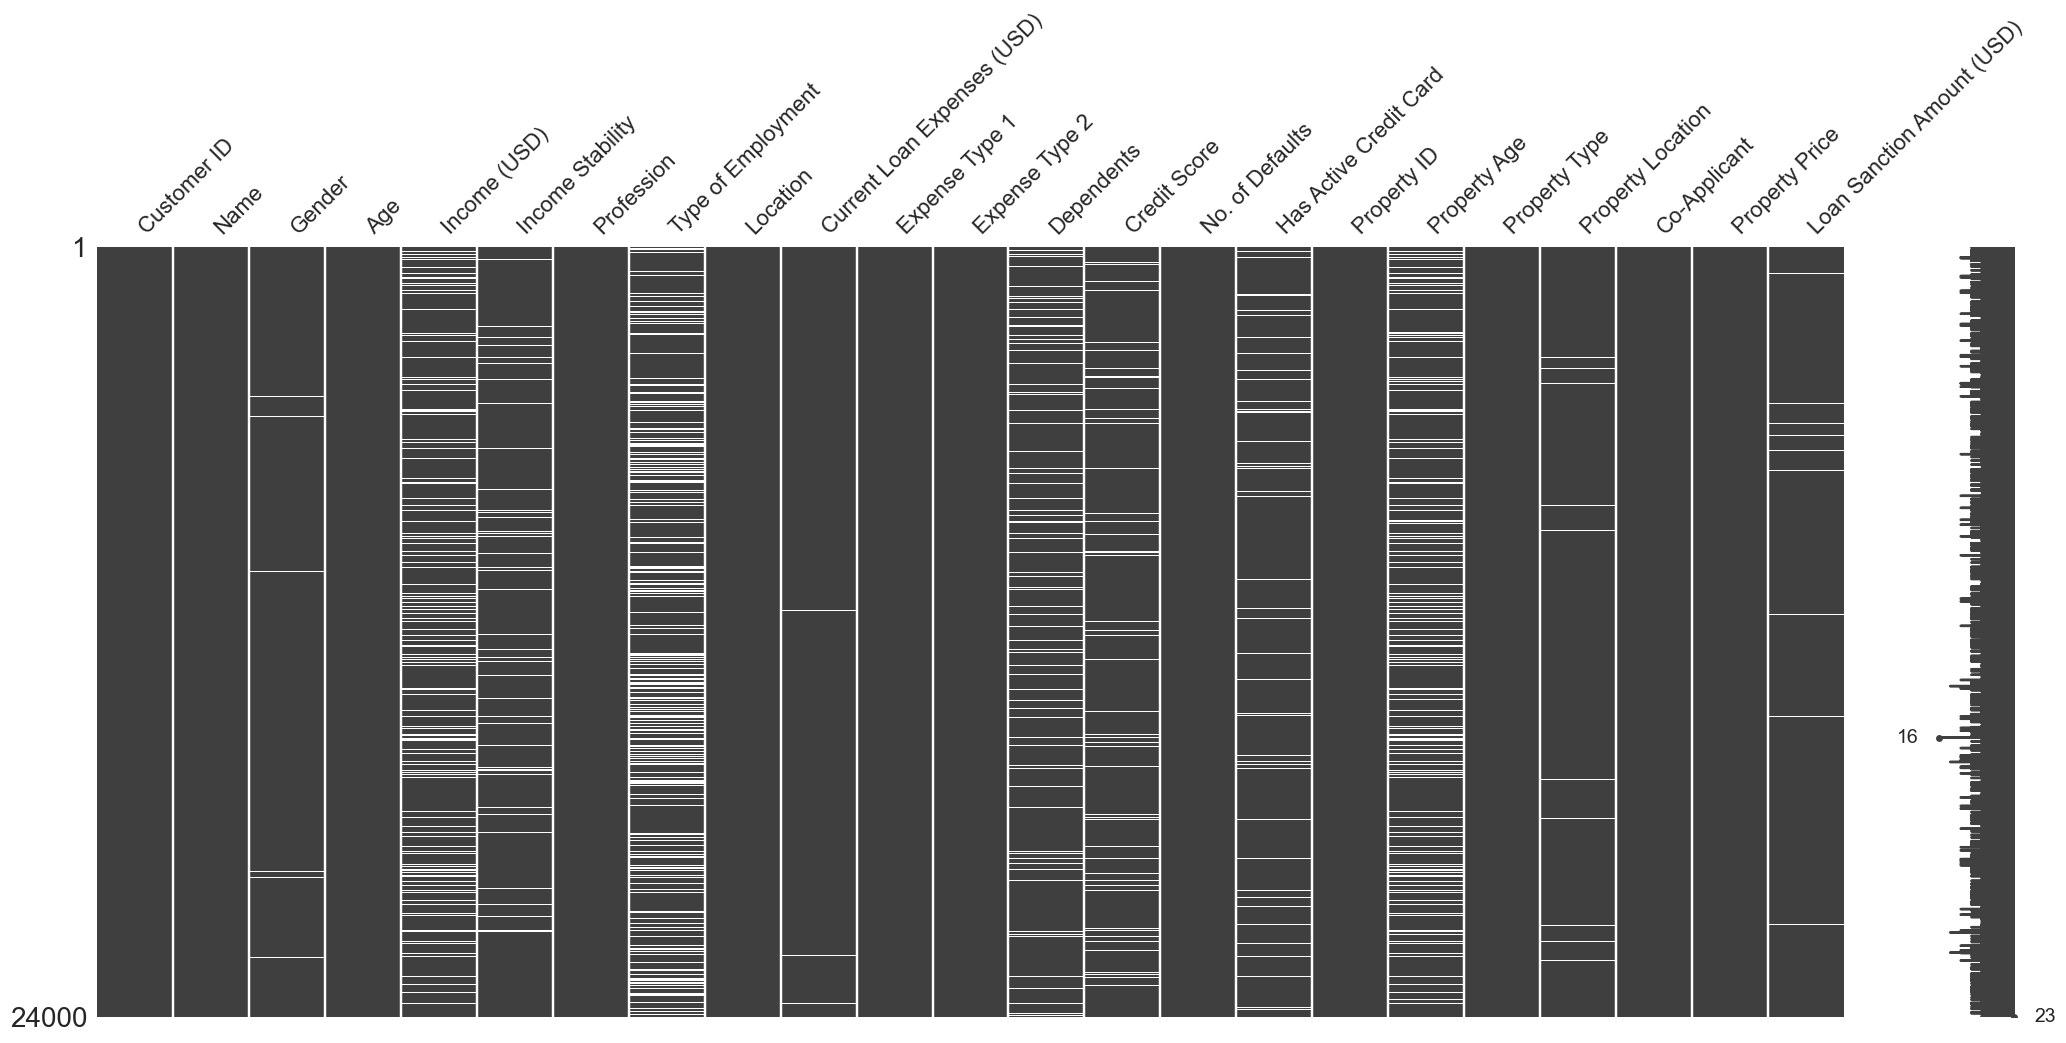

In [23]:
msno.matrix(loan_amt_train_copy)
plt.show()

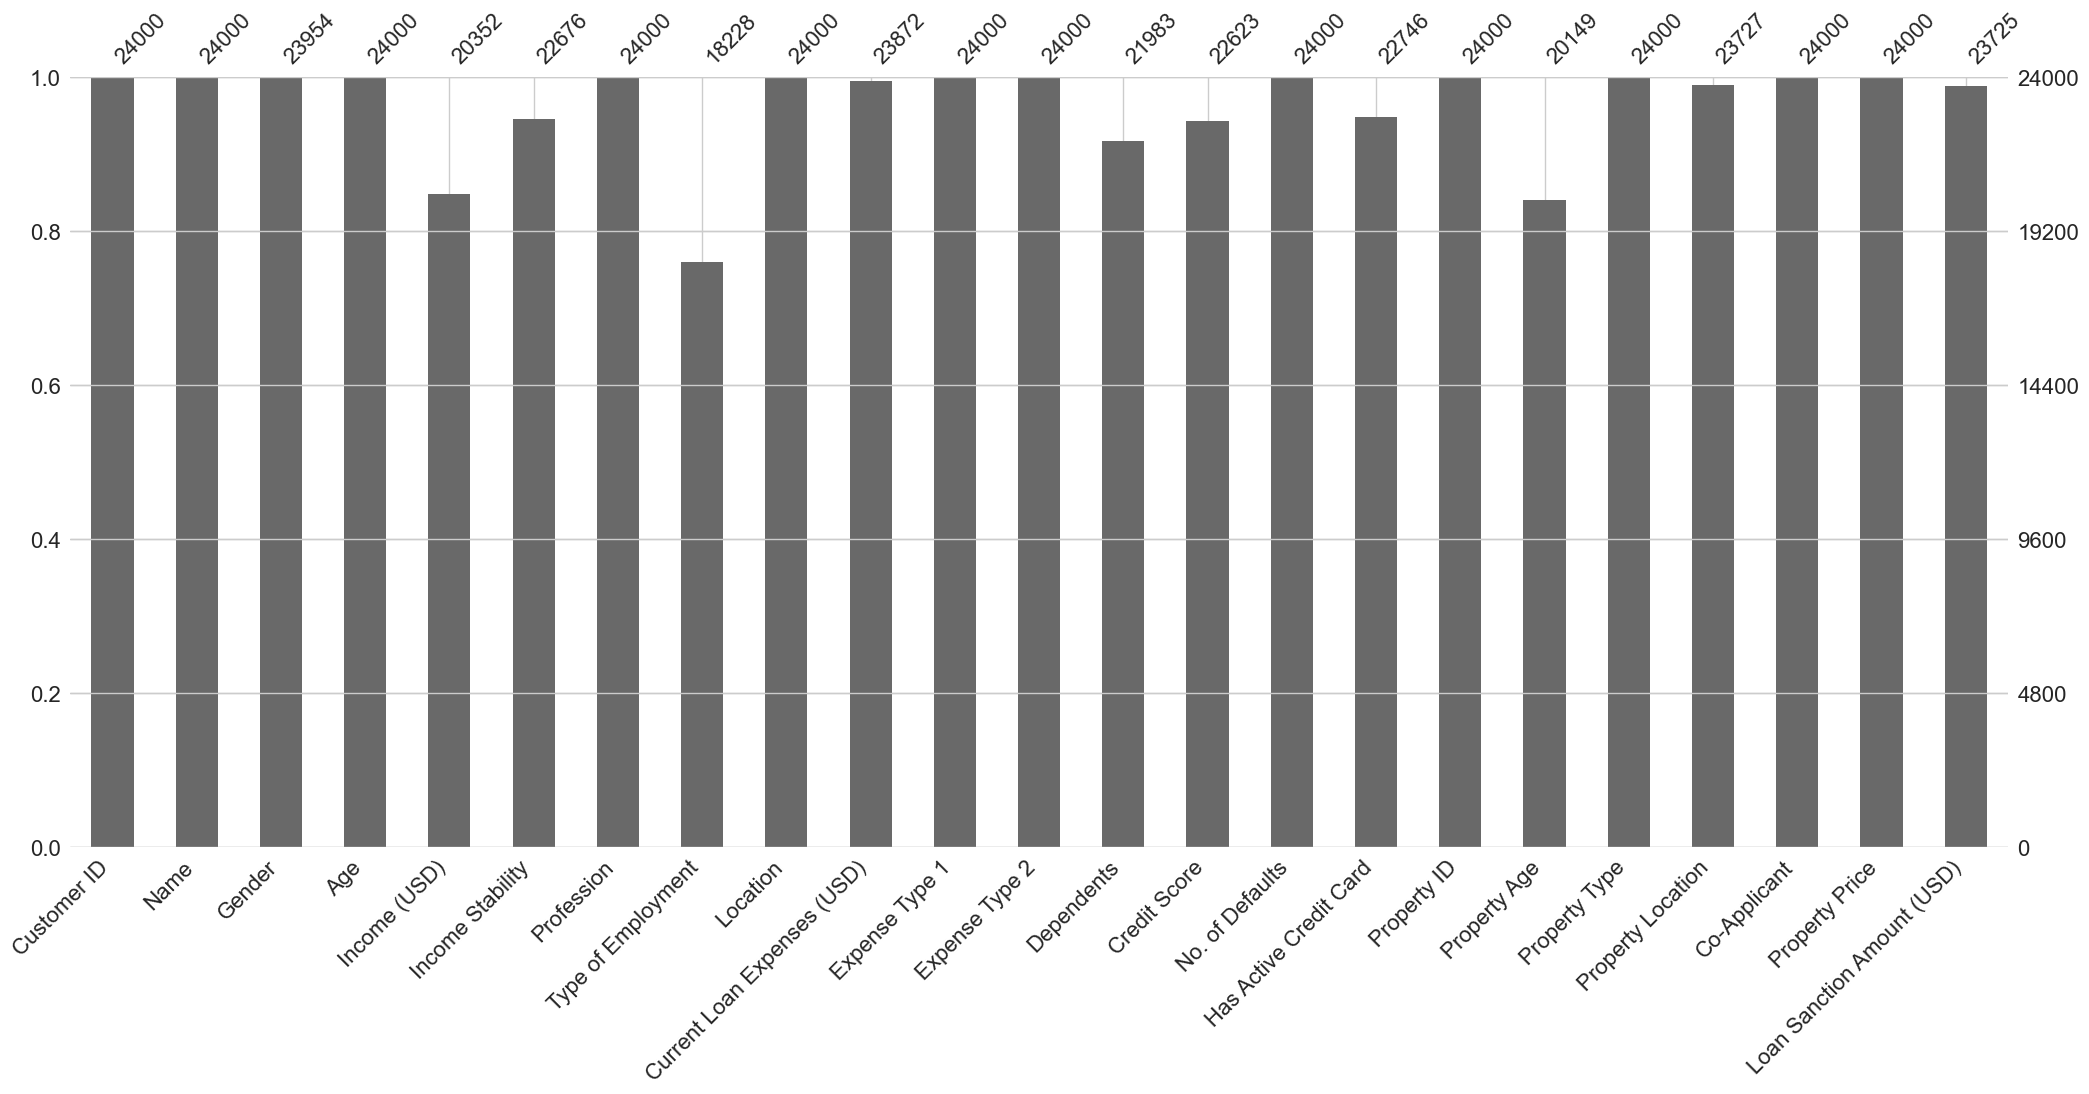

In [24]:
msno.bar(loan_amt_train_copy)
plt.show()

In [25]:
def value_cnt_norm_cal(df,feature):
    '''
    Function that will return the value count and frequency of each observation within a feature
    '''
    ftr_value_cnt = df[feature].value_counts()
    # normalize the value count
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [26]:
def gen_info_feat(df,feature):
    '''
    function to create display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe()/365.25))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_cnt_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [27]:
def create_bar_plot(df,feature):
    '''
    function to create a bar chart plot
    '''
    match feature:
        case 'Profession' | 'Type of Employment' | 'Dependents':
            fig, ax = plt.subplots(figsize=(8,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0], color='dimgray')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation=45,ha='right')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation=45,ha='right')
            plt.title('{} count'.format(feature))
            return plt.show()

In [28]:
def create_donnut_pie_chart(df,feature):
    '''
    function to create a donnut pie chart
    '''
    ratio_size = value_cnt_norm_cal(df, feature)
    ratio_size_len = len(ratio_size.index)
    ratio_list = []
    for i in range(ratio_size_len):
        ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
    fig, ax = plt.subplots(figsize=(8,8))
    # %1.2f%% display decimals in the pie chart with 2 decimal places
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
    plt.title('Pie chart of {}'.format(feature))
    plt.legend(loc='best')
    plt.axis('equal')
    # add a circle at the center to transform it in a donut chart
    circle=plt.Circle( (0,0), 0.8, color='white')
    p=plt.gcf()
    p.gca().add_artist(circle)
    return plt.show()

In [29]:
def create_box_plot(df,feature):
    '''
    function to create a box plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize=(2, 8))
            sns.boxplot(y=df[feature]/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [30]:
def create_hist_plot(df,feature, the_bins=50):
    '''
    function to create a histogram plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize=(18, 10))
            sns.histplot(df[feature]/365.25, bins=the_bins, kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [31]:
def missing_val_norm(df,feature):
    feat_nan_count = df[feature].isnull().sum()
    rows_count = df.shape[0]
    return 'The percentage of missing rows is {:.2f} %'.format(feat_nan_count * 100 / rows_count)

In [32]:
gen_info_feat(loan_amt_train_copy,'Gender')

Description:
count     23954
unique        2
top           M
freq      12087
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
M  12087      50.459213
F  11867      49.540787


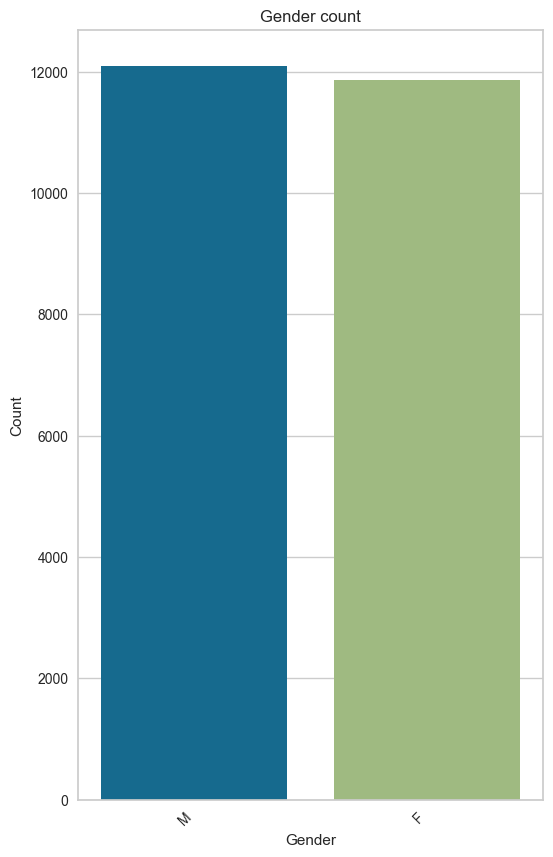

In [33]:
create_bar_plot(loan_amt_train_copy,'Gender')

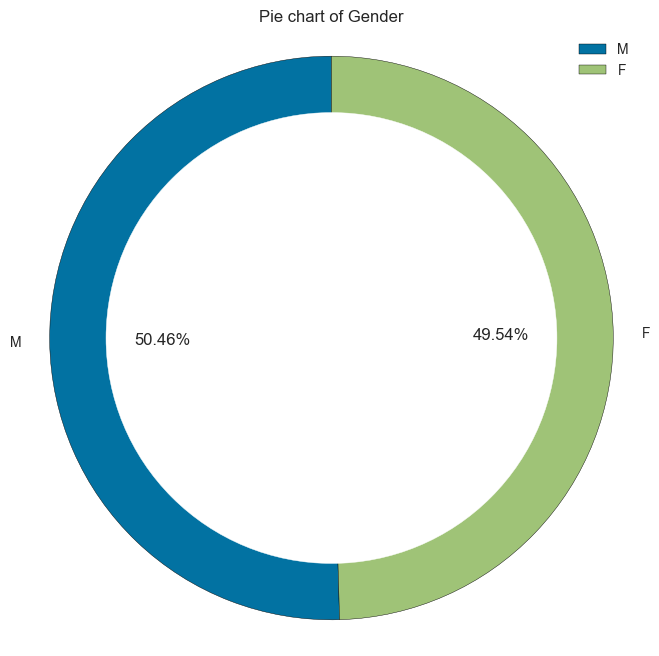

In [34]:
create_donnut_pie_chart(loan_amt_train_copy,'Gender')

In [35]:
gen_info_feat(loan_amt_train_copy, 'Age')

Description:
count    24000.000000
mean        40.058417
std         16.029209
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.05019079901588933


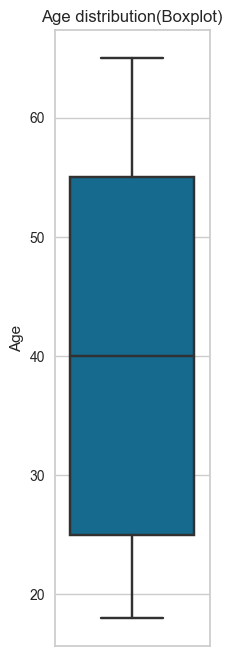

In [36]:
create_box_plot(loan_amt_train_copy, 'Age')

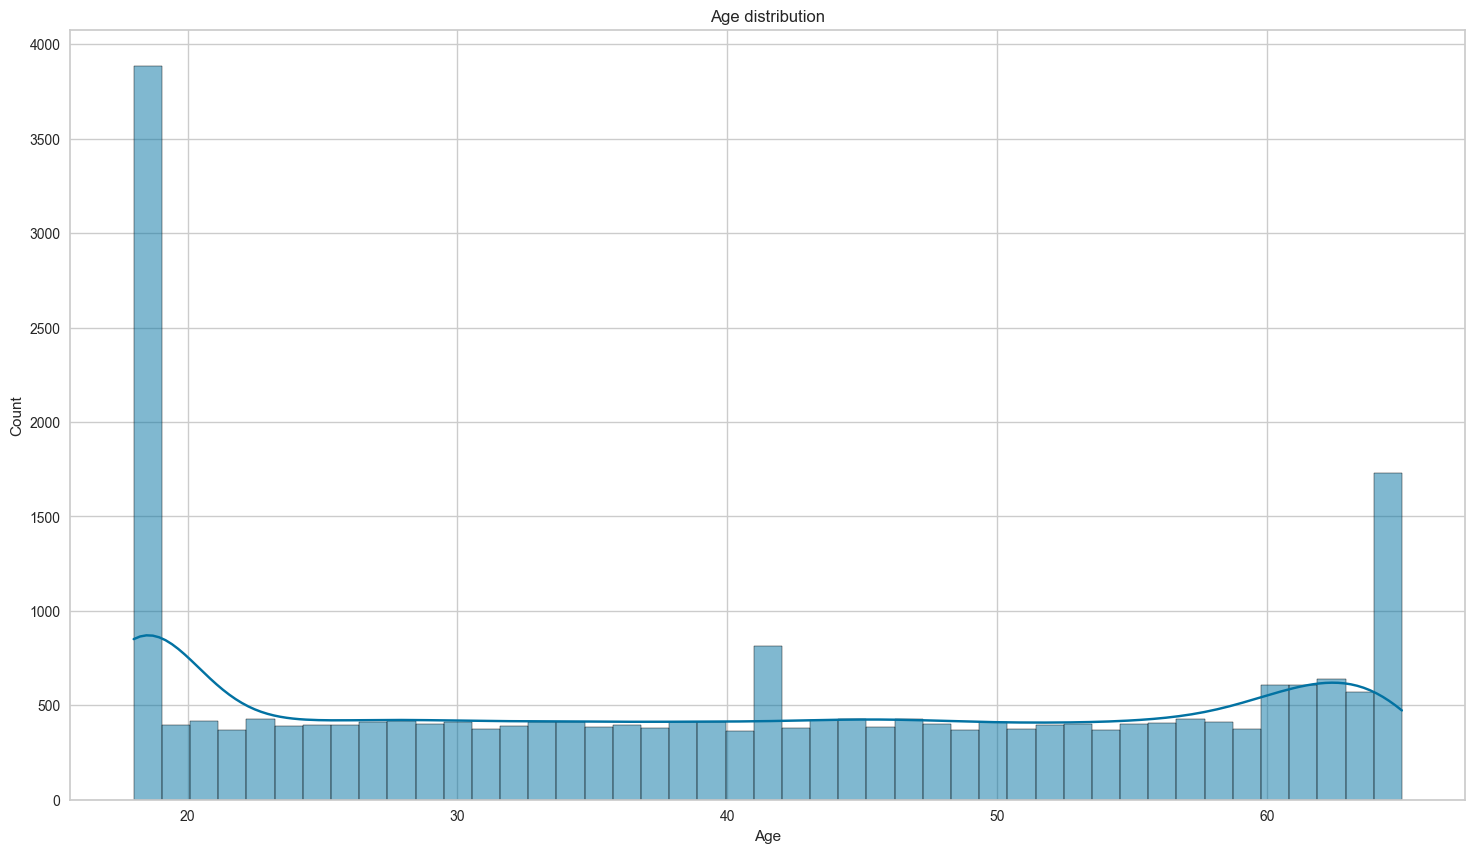

In [37]:
create_hist_plot(loan_amt_train_copy, 'Age', the_bins=45)

In [38]:
gen_info_feat(loan_amt_train_copy, 'Income (USD)')

Description:
count     20352.000000
mean       2567.533530
std        1775.075442
min         378.760000
25%        1652.707500
50%        2229.965000
75%        3092.775000
max      122966.280000
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
19.759160741711046


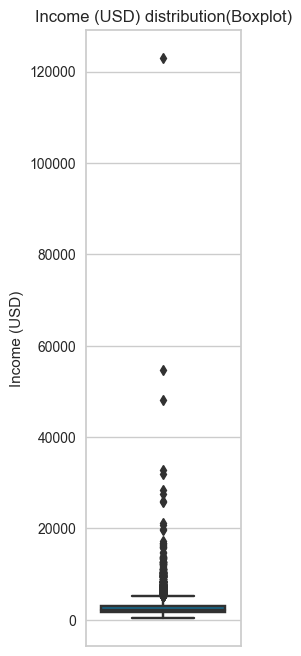

In [39]:

create_box_plot(loan_amt_train_copy, 'Income (USD)')

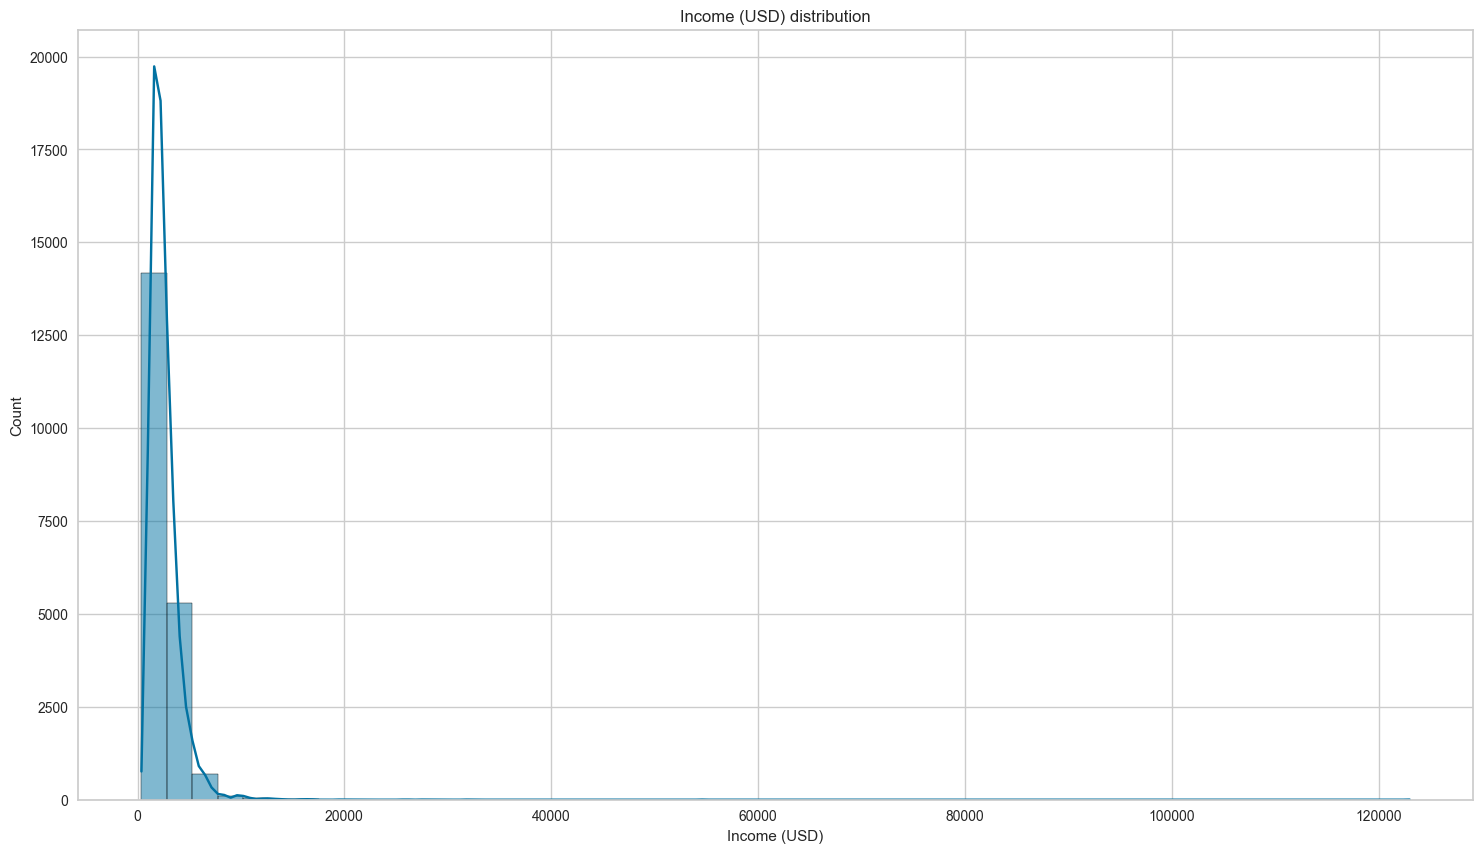

In [40]:
create_hist_plot(loan_amt_train_copy, 'Income (USD)', the_bins=50)

In [41]:
missing_val_norm(loan_amt_train_copy, 'Income (USD)')

'The percentage of missing rows is 15.20 %'

In [42]:
gen_info_feat(loan_amt_train_copy,'Income Stability')

Description:
count     22676
unique        2
top         Low
freq      20617
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
      Count  Frequency (%)
Low   20617      90.919915
High   2059       9.080085


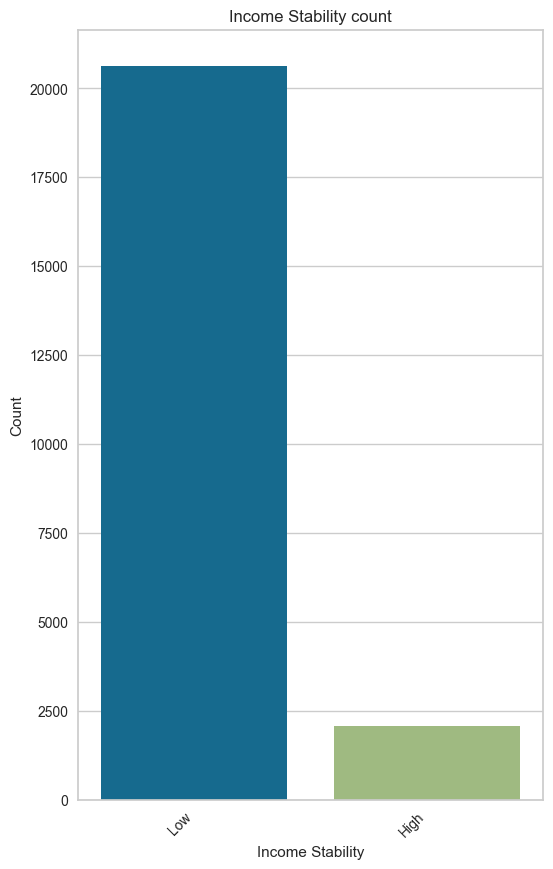

In [43]:
create_bar_plot(loan_amt_train_copy,'Income Stability')

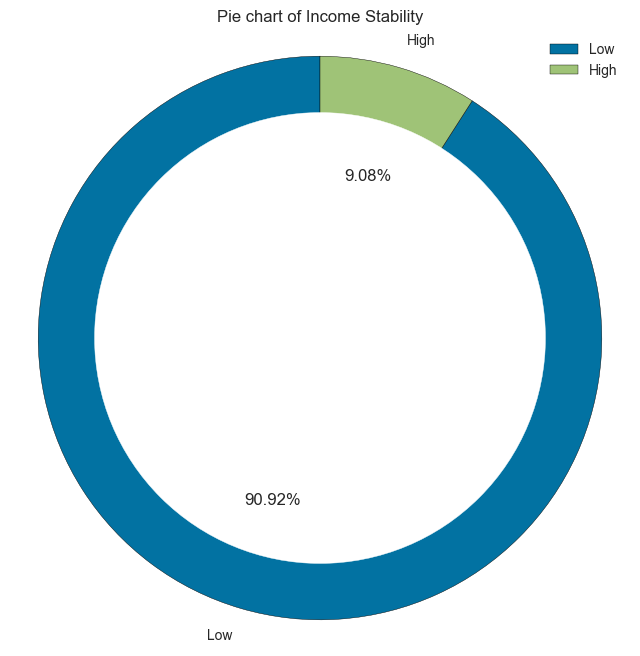

In [44]:
create_donnut_pie_chart(loan_amt_train_copy,'Income Stability')

In [45]:
gen_info_feat(loan_amt_train_copy,'Profession')

Description:
count       24000
unique          7
top       Working
freq        13509
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working               13509      56.287500
Commercial associate   6433      26.804167
Pensioner              2193       9.137500
State servant          1861       7.754167
Unemployed                2       0.008333
Businessman               1       0.004167
Student                   1       0.004167


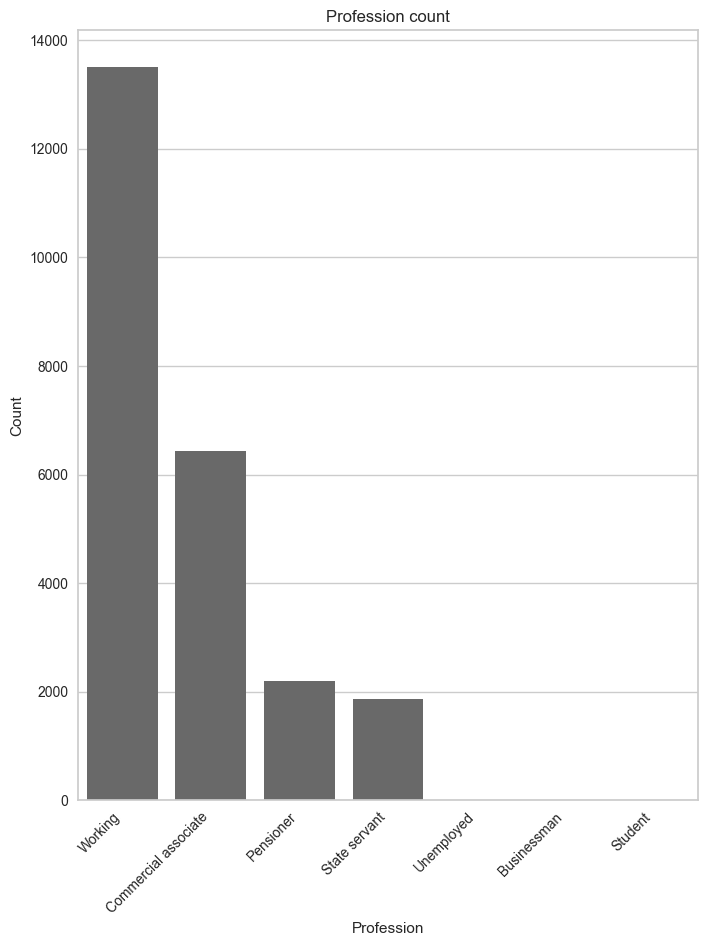

In [46]:
create_bar_plot(loan_amt_train_copy,'Profession')

In [47]:

gen_info_feat(loan_amt_train_copy,'Type of Employment')

Description:
count        18228
unique          18
top       Laborers
freq          4495
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                4495      24.659864
Sales staff             2997      16.441738
Core staff              2605      14.291200
Managers                1996      10.950187
Drivers                 1273       6.983761
Accountants             1096       6.012728
High skill tech staff   1044       5.727452
Medicine staff           669       3.670178
Security staff           477       2.616853
Cooking staff            446       2.446785
Cleaning staff           283       1.552557
Private service staff    280       1.536098
Secretaries              132       0.724161
Low-skill Laborers       125       0.685758
Waiters/barmen staff     122       0.669300
Realty agents             73    

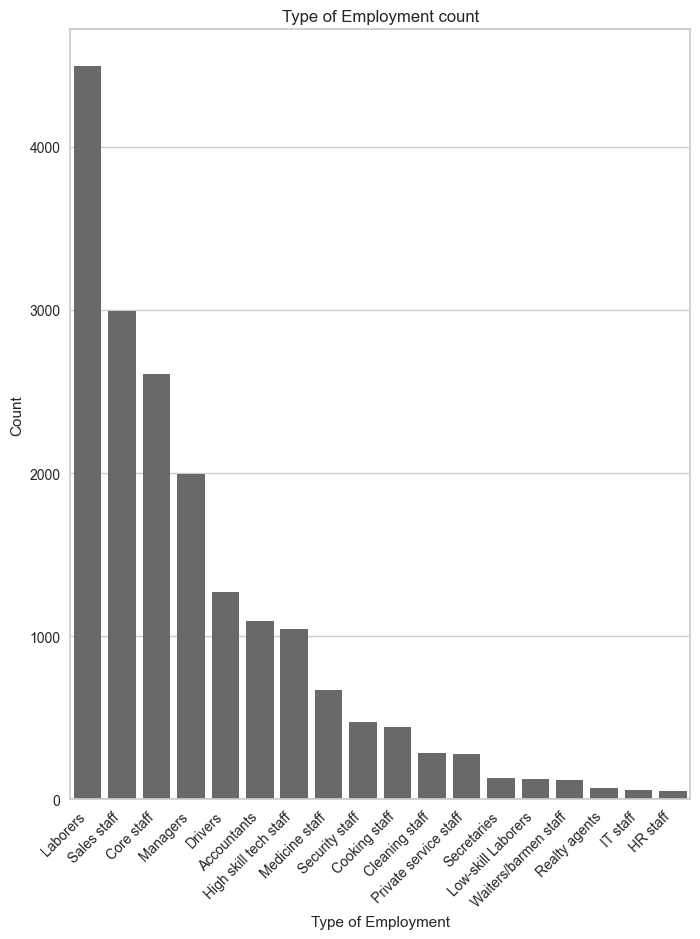

In [48]:
create_bar_plot(loan_amt_train_copy,'Type of Employment')

In [49]:
gen_info_feat(loan_amt_train_copy,'Location')

Description:
count          24000
unique             3
top       Semi-Urban
freq           17157
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  17157        71.4875
Rural        4320        18.0000
Urban        2523        10.5125


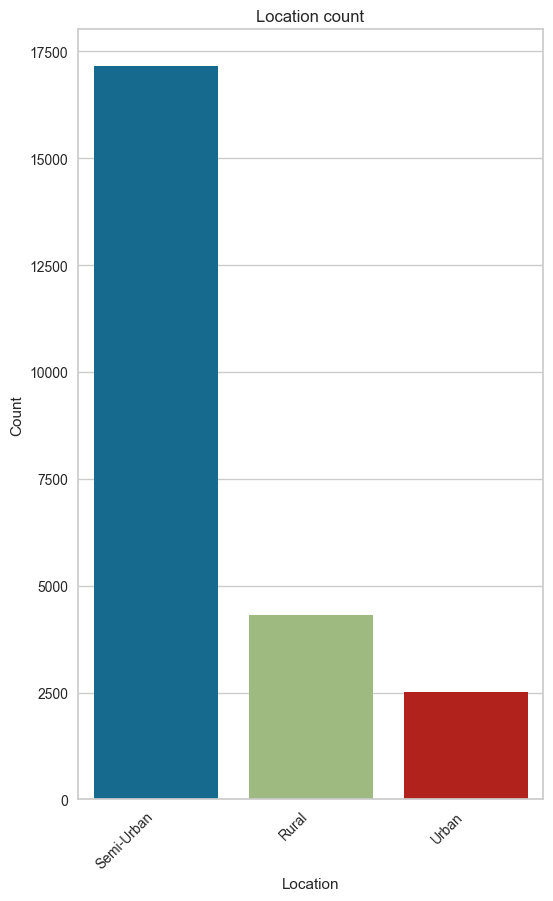

In [50]:
create_bar_plot(loan_amt_train_copy,'Location')

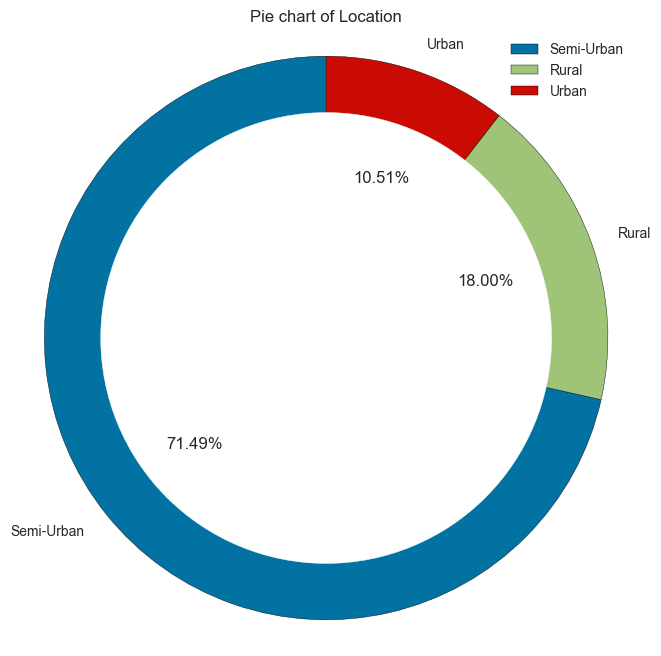

In [51]:
create_donnut_pie_chart(loan_amt_train_copy,'Location')

In [52]:
gen_info_feat(loan_amt_train_copy,'Current Loan Expenses (USD)')

Description:
count    23872.000000
mean       401.409325
std        241.893479
min       -999.000000
25%        248.932500
50%        375.275000
75%        521.215000
max       3419.660000
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.032881699548371904


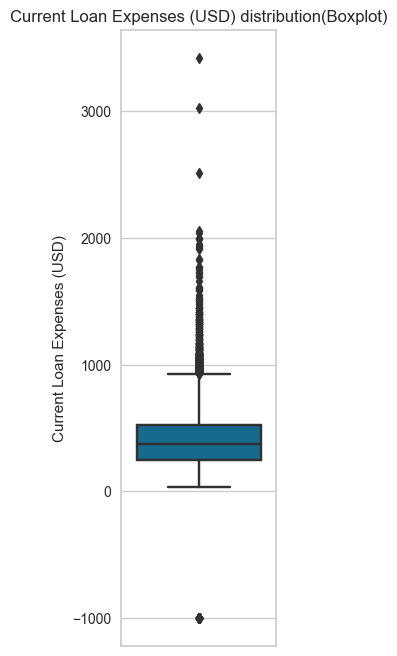

In [53]:

create_box_plot(loan_amt_train_copy, 'Current Loan Expenses (USD)')

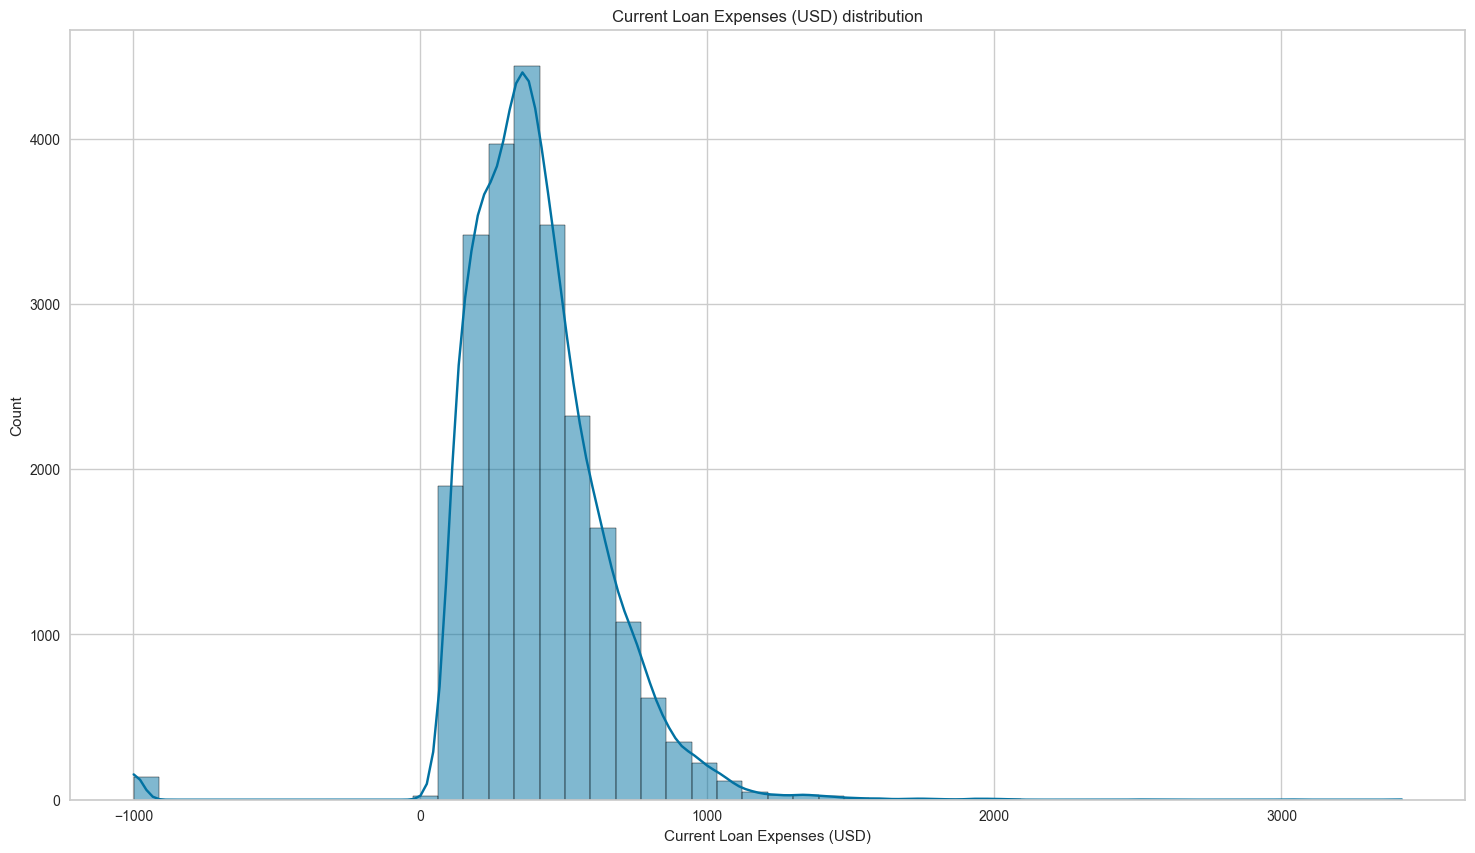

In [54]:
create_hist_plot(loan_amt_train_copy, 'Current Loan Expenses (USD)')

In [55]:
gen_info_feat(loan_amt_train_copy,'Expense Type 1')

Description:
count     24000
unique        2
top           N
freq      15361
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  15361      64.004167
Y   8639      35.995833


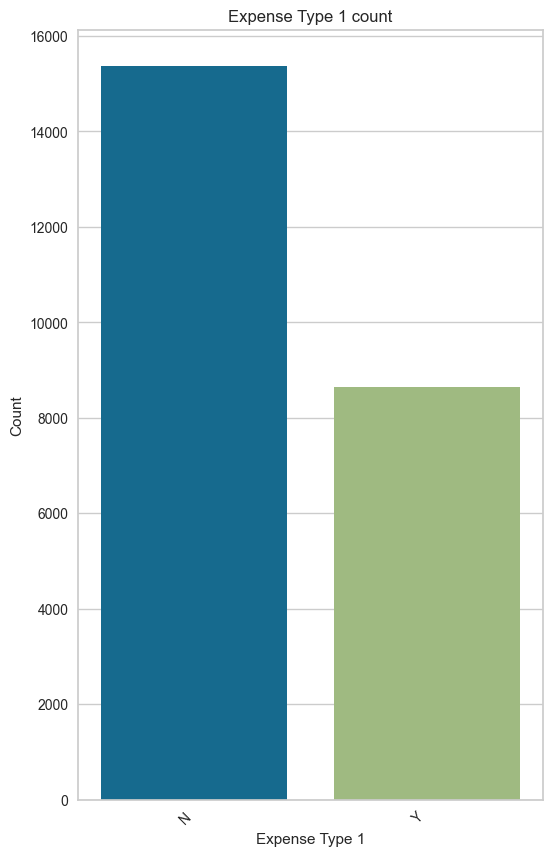

In [56]:
create_bar_plot(loan_amt_train_copy,'Expense Type 1')

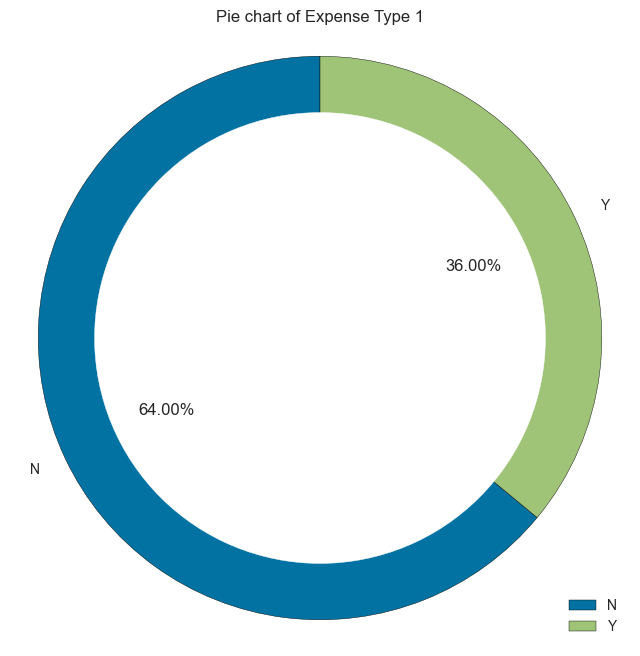

In [57]:
create_donnut_pie_chart(loan_amt_train_copy,'Expense Type 1')

In [58]:
gen_info_feat(loan_amt_train_copy,'Expense Type 2')

Description:
count     24000
unique        2
top           Y
freq      16116
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y  16116          67.15
N   7884          32.85


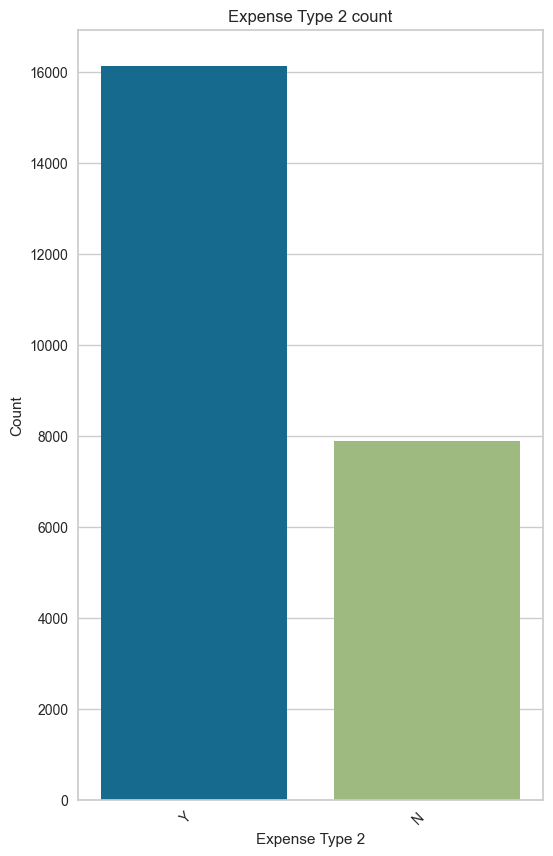

In [59]:
create_bar_plot(loan_amt_train_copy,'Expense Type 2')

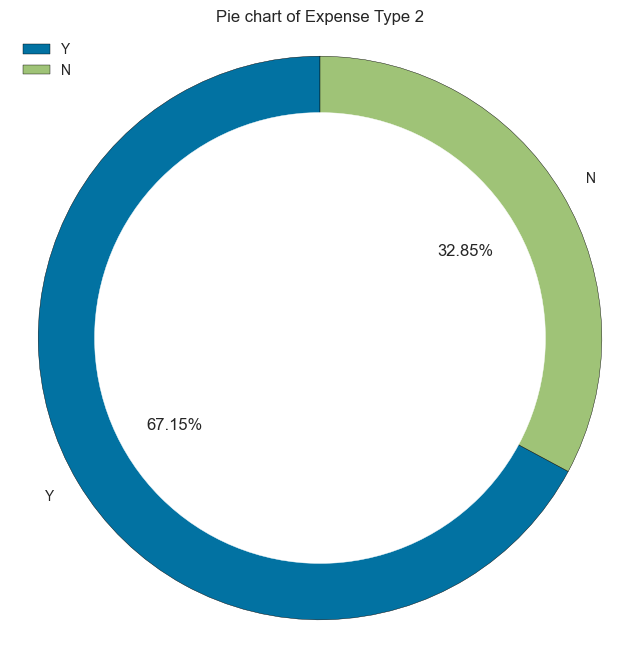

In [60]:
create_donnut_pie_chart(loan_amt_train_copy,'Expense Type 2')

In [61]:
gen_info_feat(loan_amt_train_copy,'Dependents')

Description:
count    21983.000000
mean         2.250512
std          0.947379
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
2.0   10471      47.632261
3.0    4568      20.779693
1.0    4447      20.229268
4.0    2160       9.825774
5.0     293       1.332848
6.0      37       0.168312
7.0       5       0.022745
8.0       1       0.004549
10.0      1       0.004549


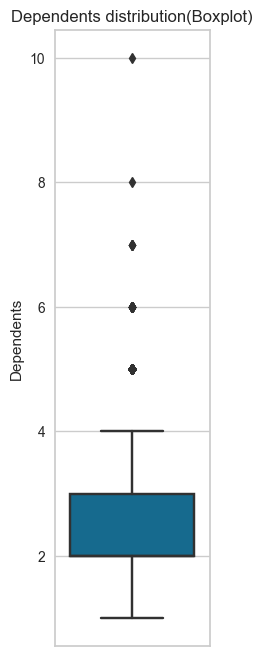

In [62]:
create_box_plot(loan_amt_train_copy, 'Dependents')

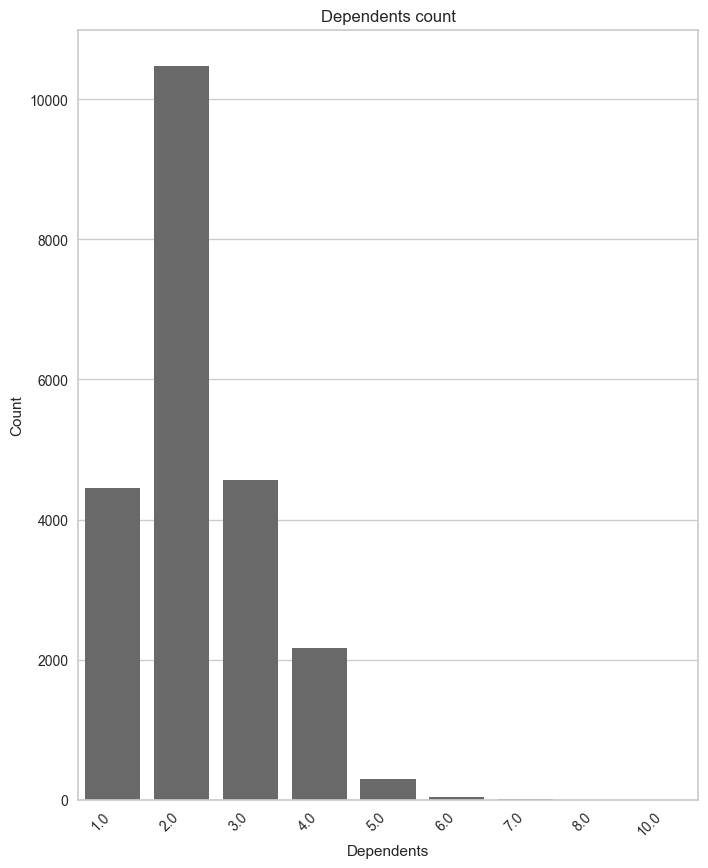

In [63]:
create_bar_plot(loan_amt_train_copy,'Dependents')

In [64]:
gen_info_feat(loan_amt_train_copy,'Credit Score')

Description:
count    22623.000000
mean       739.726632
std         72.271823
min        580.000000
25%        681.225000
50%        739.880000
75%        799.090000
max        896.260000
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.021671118190646724


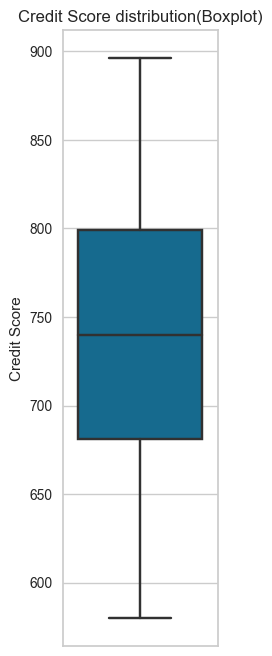

In [65]:
create_box_plot(loan_amt_train_copy, 'Credit Score')

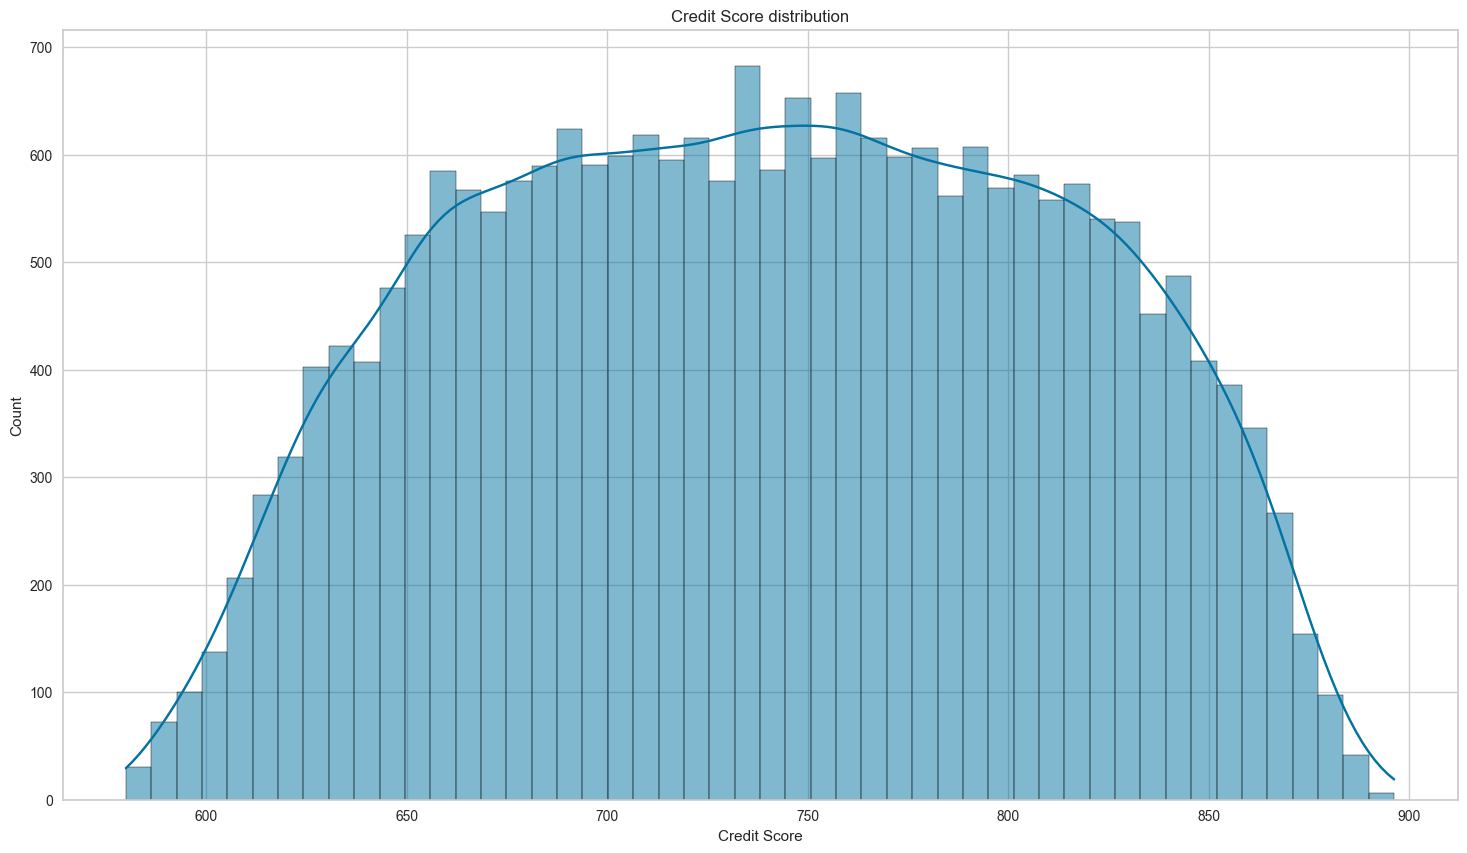

In [66]:
create_hist_plot(loan_amt_train_copy, 'Credit Score')

In [67]:

gen_info_feat(loan_amt_train_copy,'No. of Defaults')

Description:
count    24000.000000
mean         0.193875
std          0.395340
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0  19347        80.6125
1   4653        19.3875


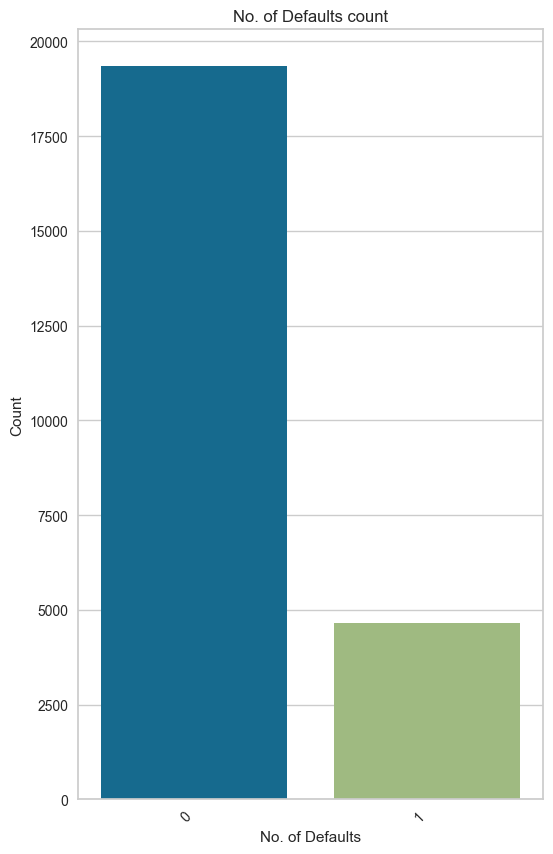

In [68]:
create_bar_plot(loan_amt_train_copy,'No. of Defaults')

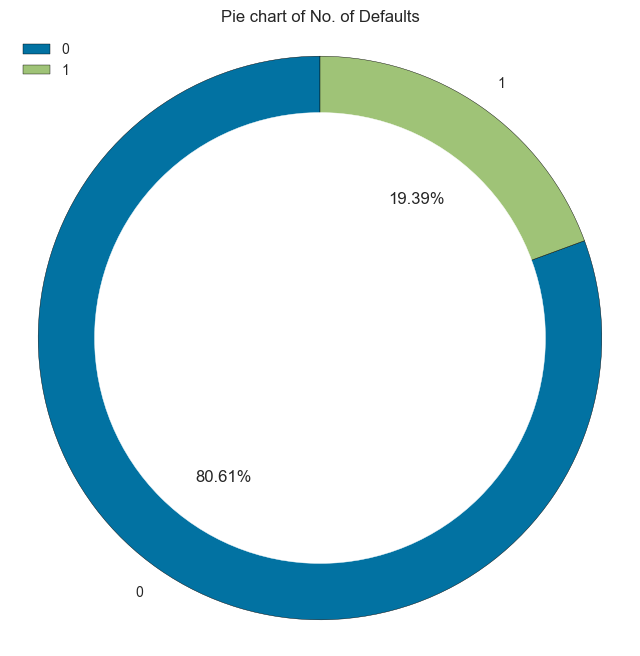

In [69]:
create_donnut_pie_chart(loan_amt_train_copy,'No. of Defaults')

In [70]:
gen_info_feat(loan_amt_train_copy,'Has Active Credit Card')

Description:
count      22746
unique         3
top       Active
freq        7799
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
             Count  Frequency (%)
Active        7799      34.287347
Inactive      7620      33.500396
Unpossessed   7327      32.212257


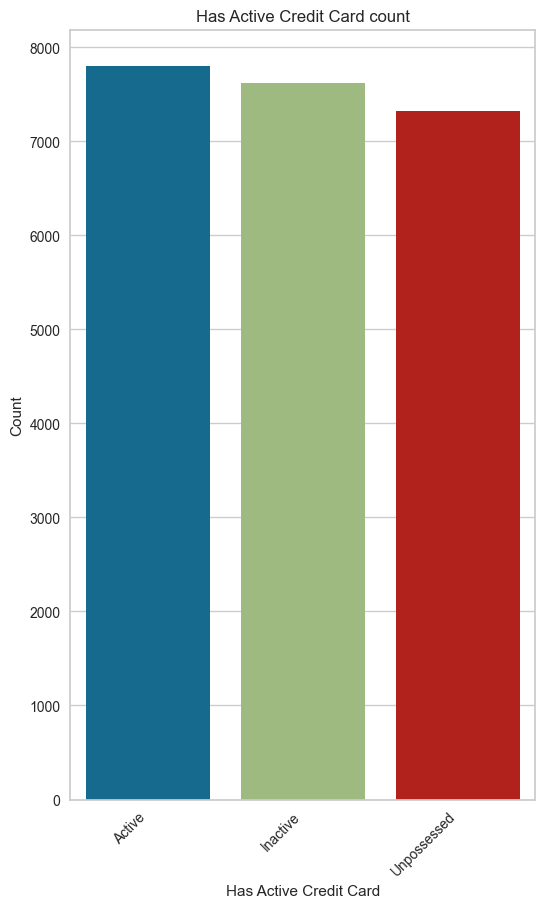

In [71]:
create_bar_plot(loan_amt_train_copy,'Has Active Credit Card')

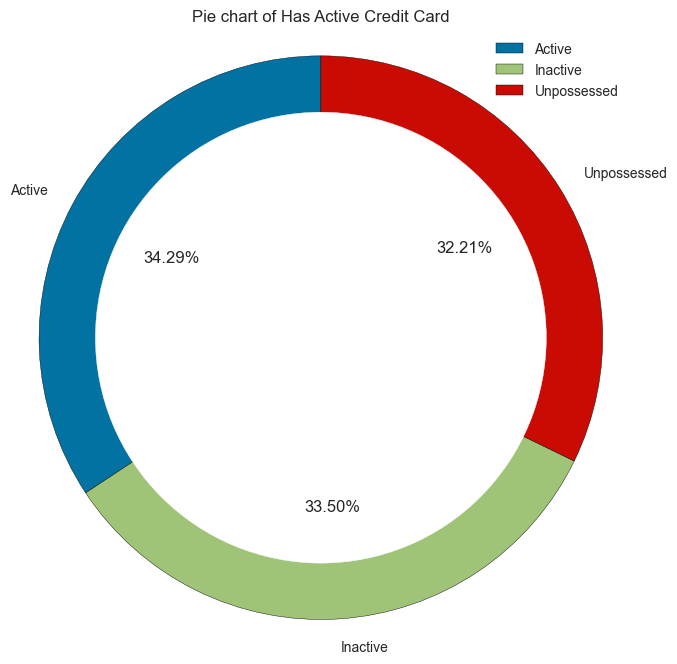

In [72]:
create_donnut_pie_chart(loan_amt_train_copy,'Has Active Credit Card')

In [73]:

gen_info_feat(loan_amt_train_copy,'Property Age')

Description:
count     55.164956
mean       7.030366
std        4.864649
min        1.036988
25%        4.525777
50%        6.108419
75%        8.471047
max      336.663326
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
19.882898494886184


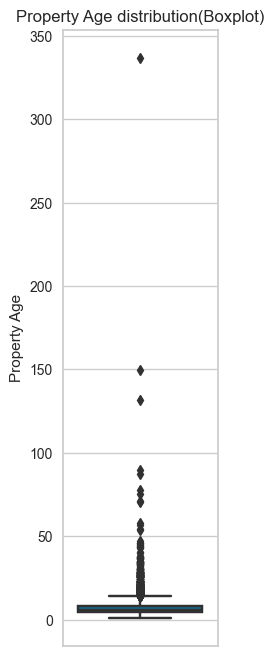

In [74]:
create_box_plot(loan_amt_train_copy, 'Property Age')

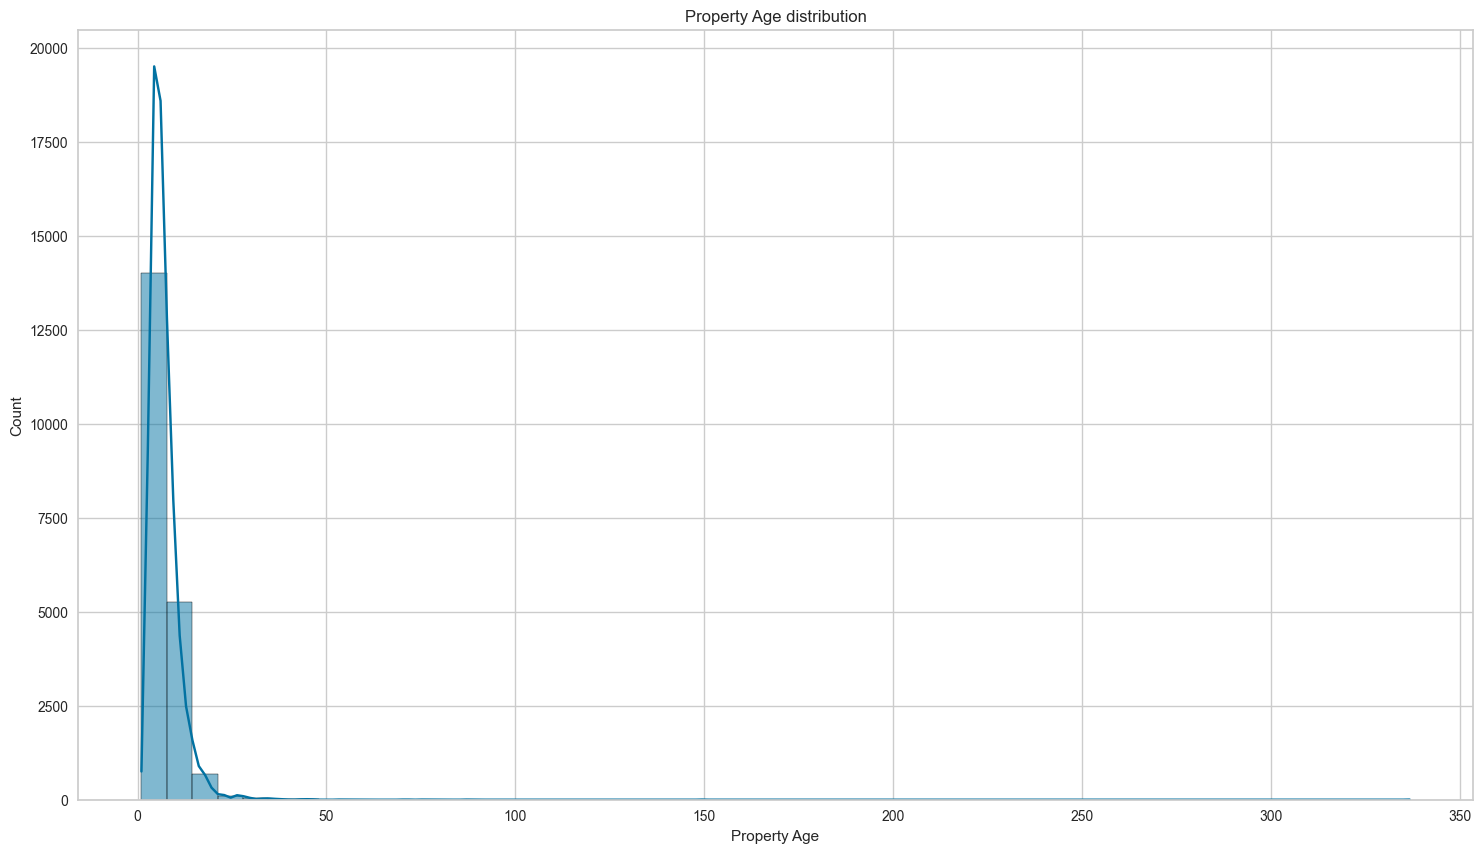

In [75]:
create_hist_plot(loan_amt_train_copy, 'Property Age')

In [76]:
gen_info_feat(loan_amt_train_copy,'Property Type')

Description:
count    24000.000000
mean         2.463708
std          1.121005
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Property Type, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
1   6304      26.266667
2   6054      25.225000
3   5851      24.379167
4   5791      24.129167


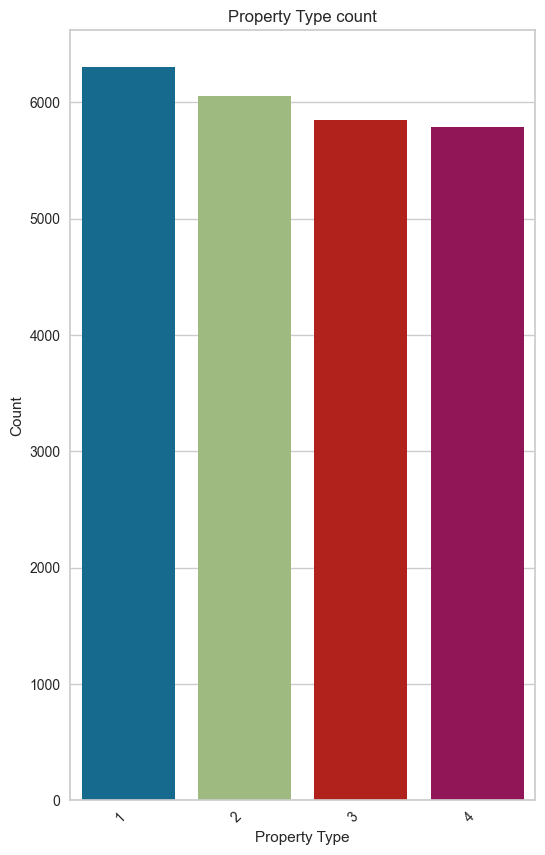

In [77]:
create_bar_plot(loan_amt_train_copy,'Property Type')

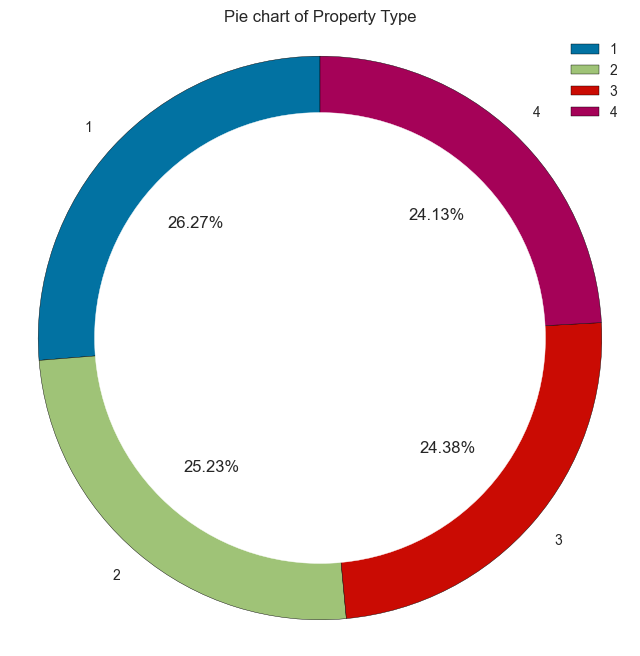

In [78]:
create_donnut_pie_chart(loan_amt_train_copy,'Property Type')

In [79]:
gen_info_feat(loan_amt_train_copy,'Property Location')

Description:
count          23727
unique             3
top       Semi-Urban
freq            8277
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban   8277      34.884309
Rural        8060      33.969739
Urban        7390      31.145952


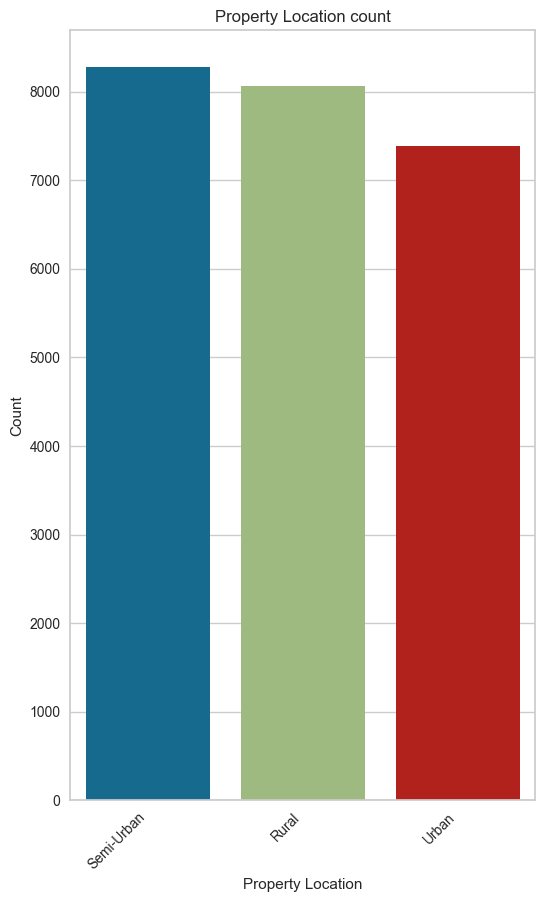

In [80]:
create_bar_plot(loan_amt_train_copy,'Property Location')

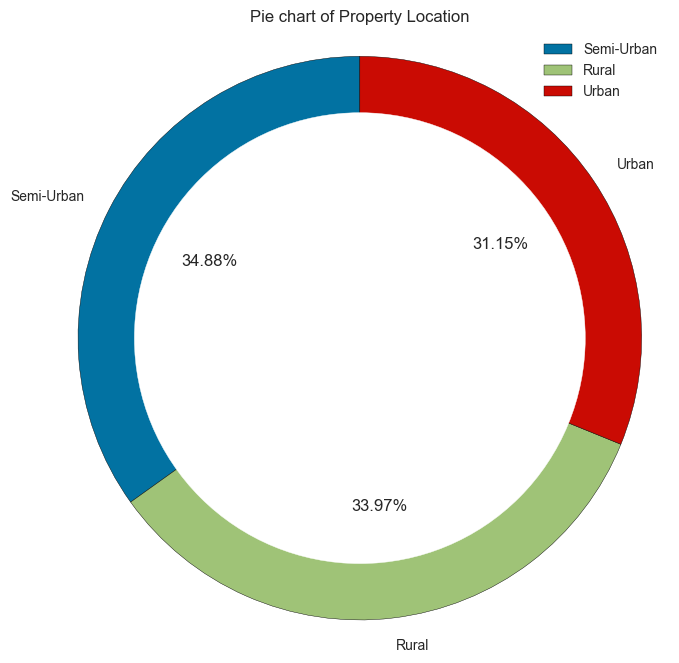

In [81]:
create_donnut_pie_chart(loan_amt_train_copy,'Property Location')

In [82]:
gen_info_feat(loan_amt_train_copy,'Co-Applicant')

Description:
count    24000.000000
mean        -4.686333
std         74.227397
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
      Count  Frequency (%)
 1    20395      84.979167
 0     3472      14.466667
-999    133       0.554167


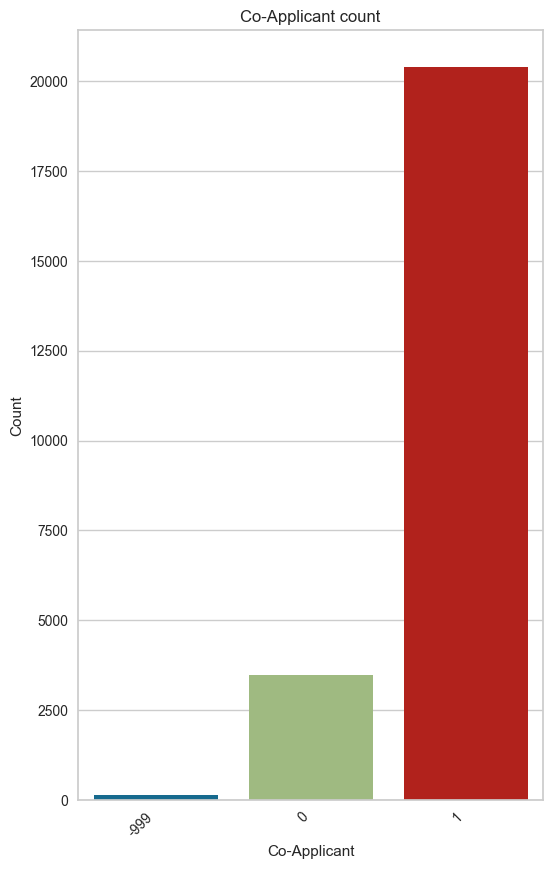

In [83]:
create_bar_plot(loan_amt_train_copy,'Co-Applicant')

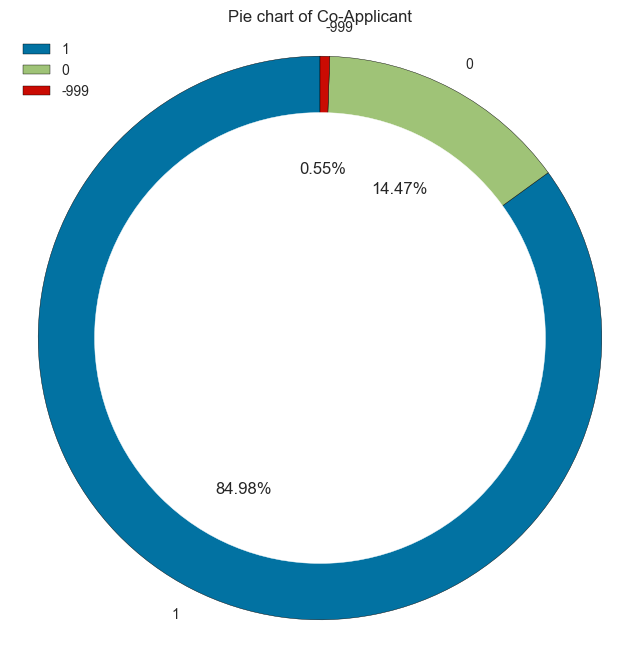

In [84]:
create_donnut_pie_chart(loan_amt_train_copy,'Co-Applicant')

In [85]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
gen_info_feat(loan_amt_train_copy,'Property Price')

Description:
count     24000.000
mean     132018.284
std       93566.244
min        -999.000
25%       60793.940
50%      110168.710
75%      179084.020
max     1077966.730
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.3990671454033115


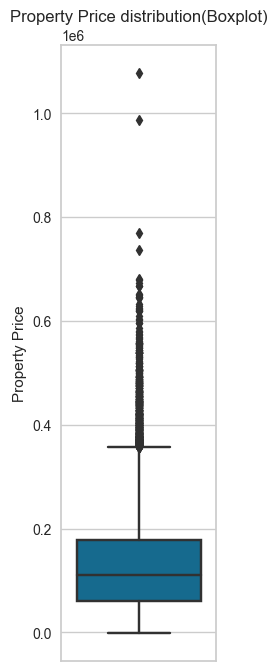

In [86]:

create_box_plot(loan_amt_train_copy, 'Property Price')

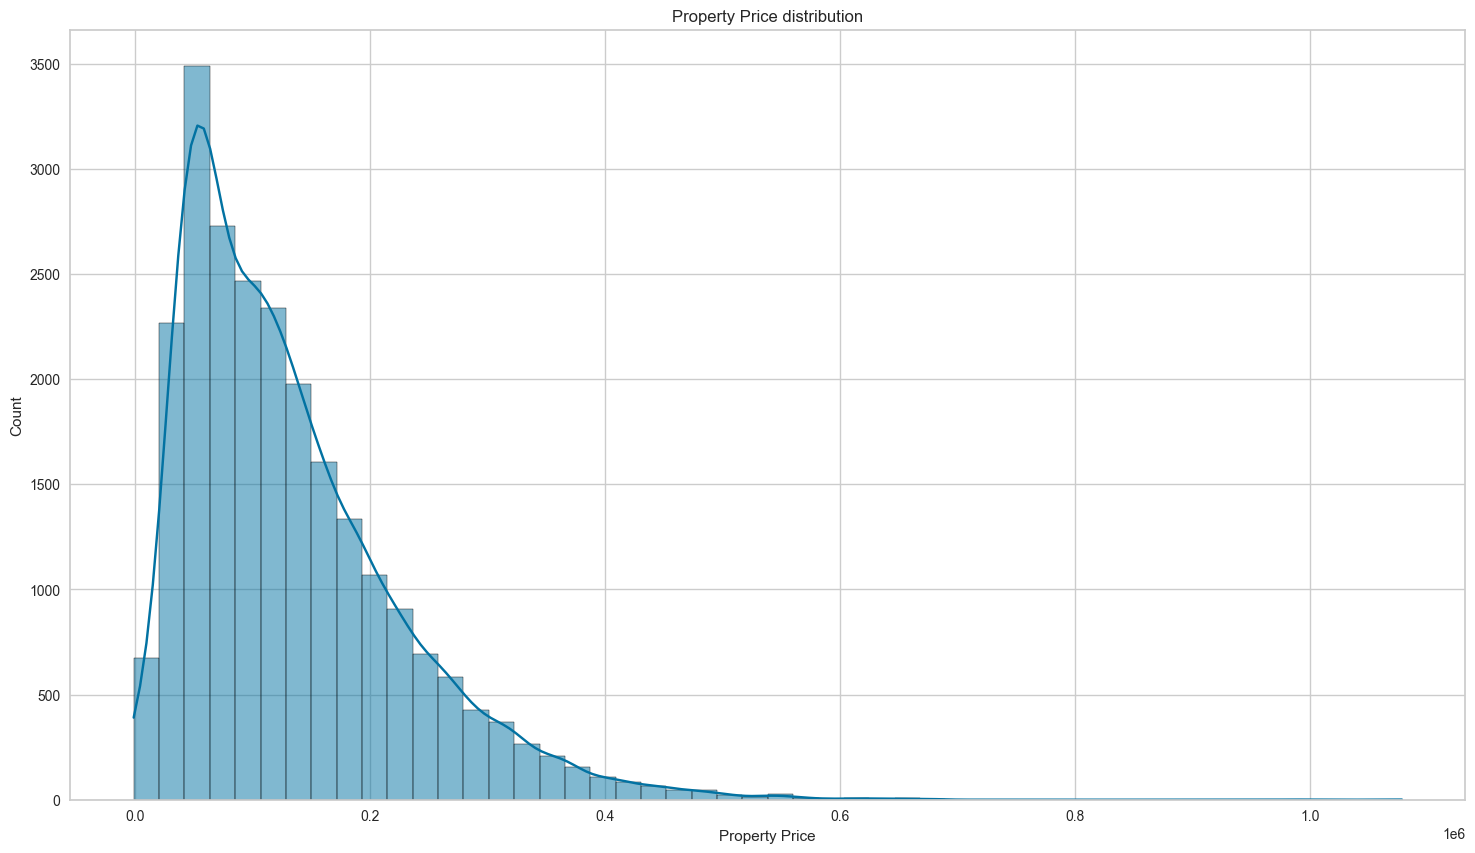

In [87]:
create_hist_plot(loan_amt_train_copy, 'Property Price')

In [88]:
gen_info_feat(loan_amt_train_copy,'Loan Sanction Amount (USD)')

Description:
count    23725.000
mean     47680.600
std      48224.125
min       -999.000
25%          0.000
50%      35273.020
75%      74217.940
max     395368.740
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2072630197126766


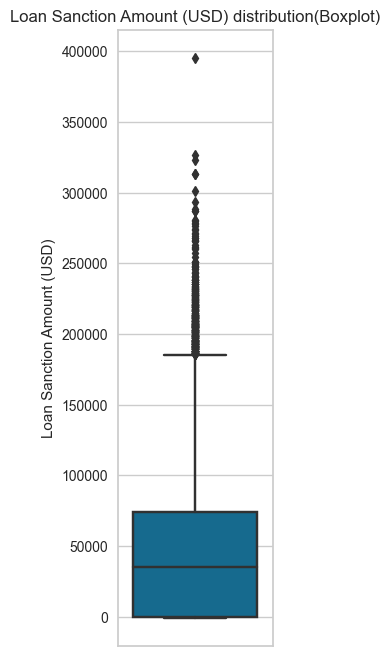

In [89]:
create_box_plot(loan_amt_train_copy, 'Loan Sanction Amount (USD)')

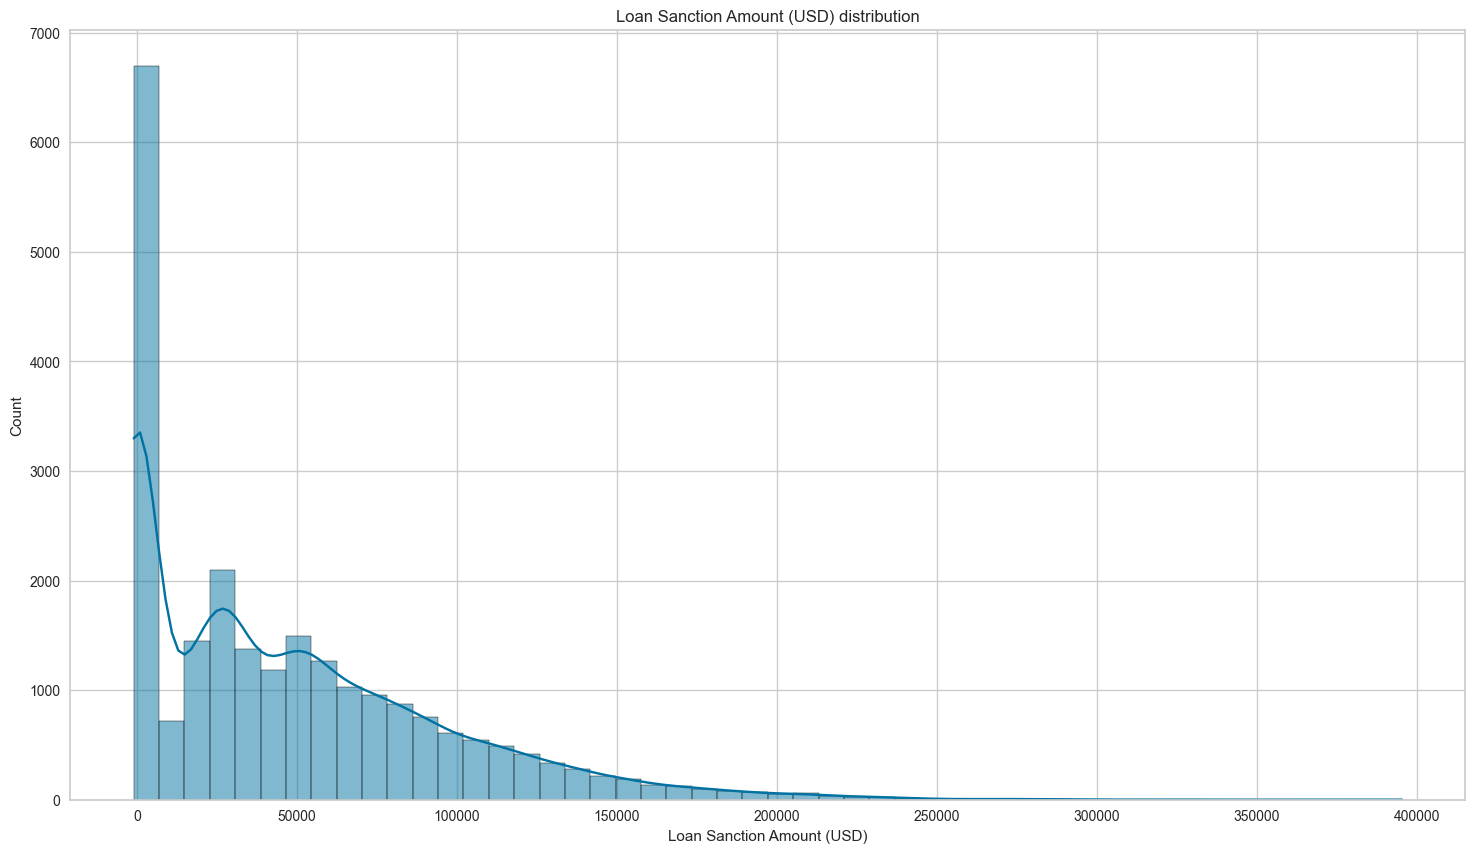

In [90]:
create_hist_plot(loan_amt_train_copy, 'Loan Sanction Amount (USD)')

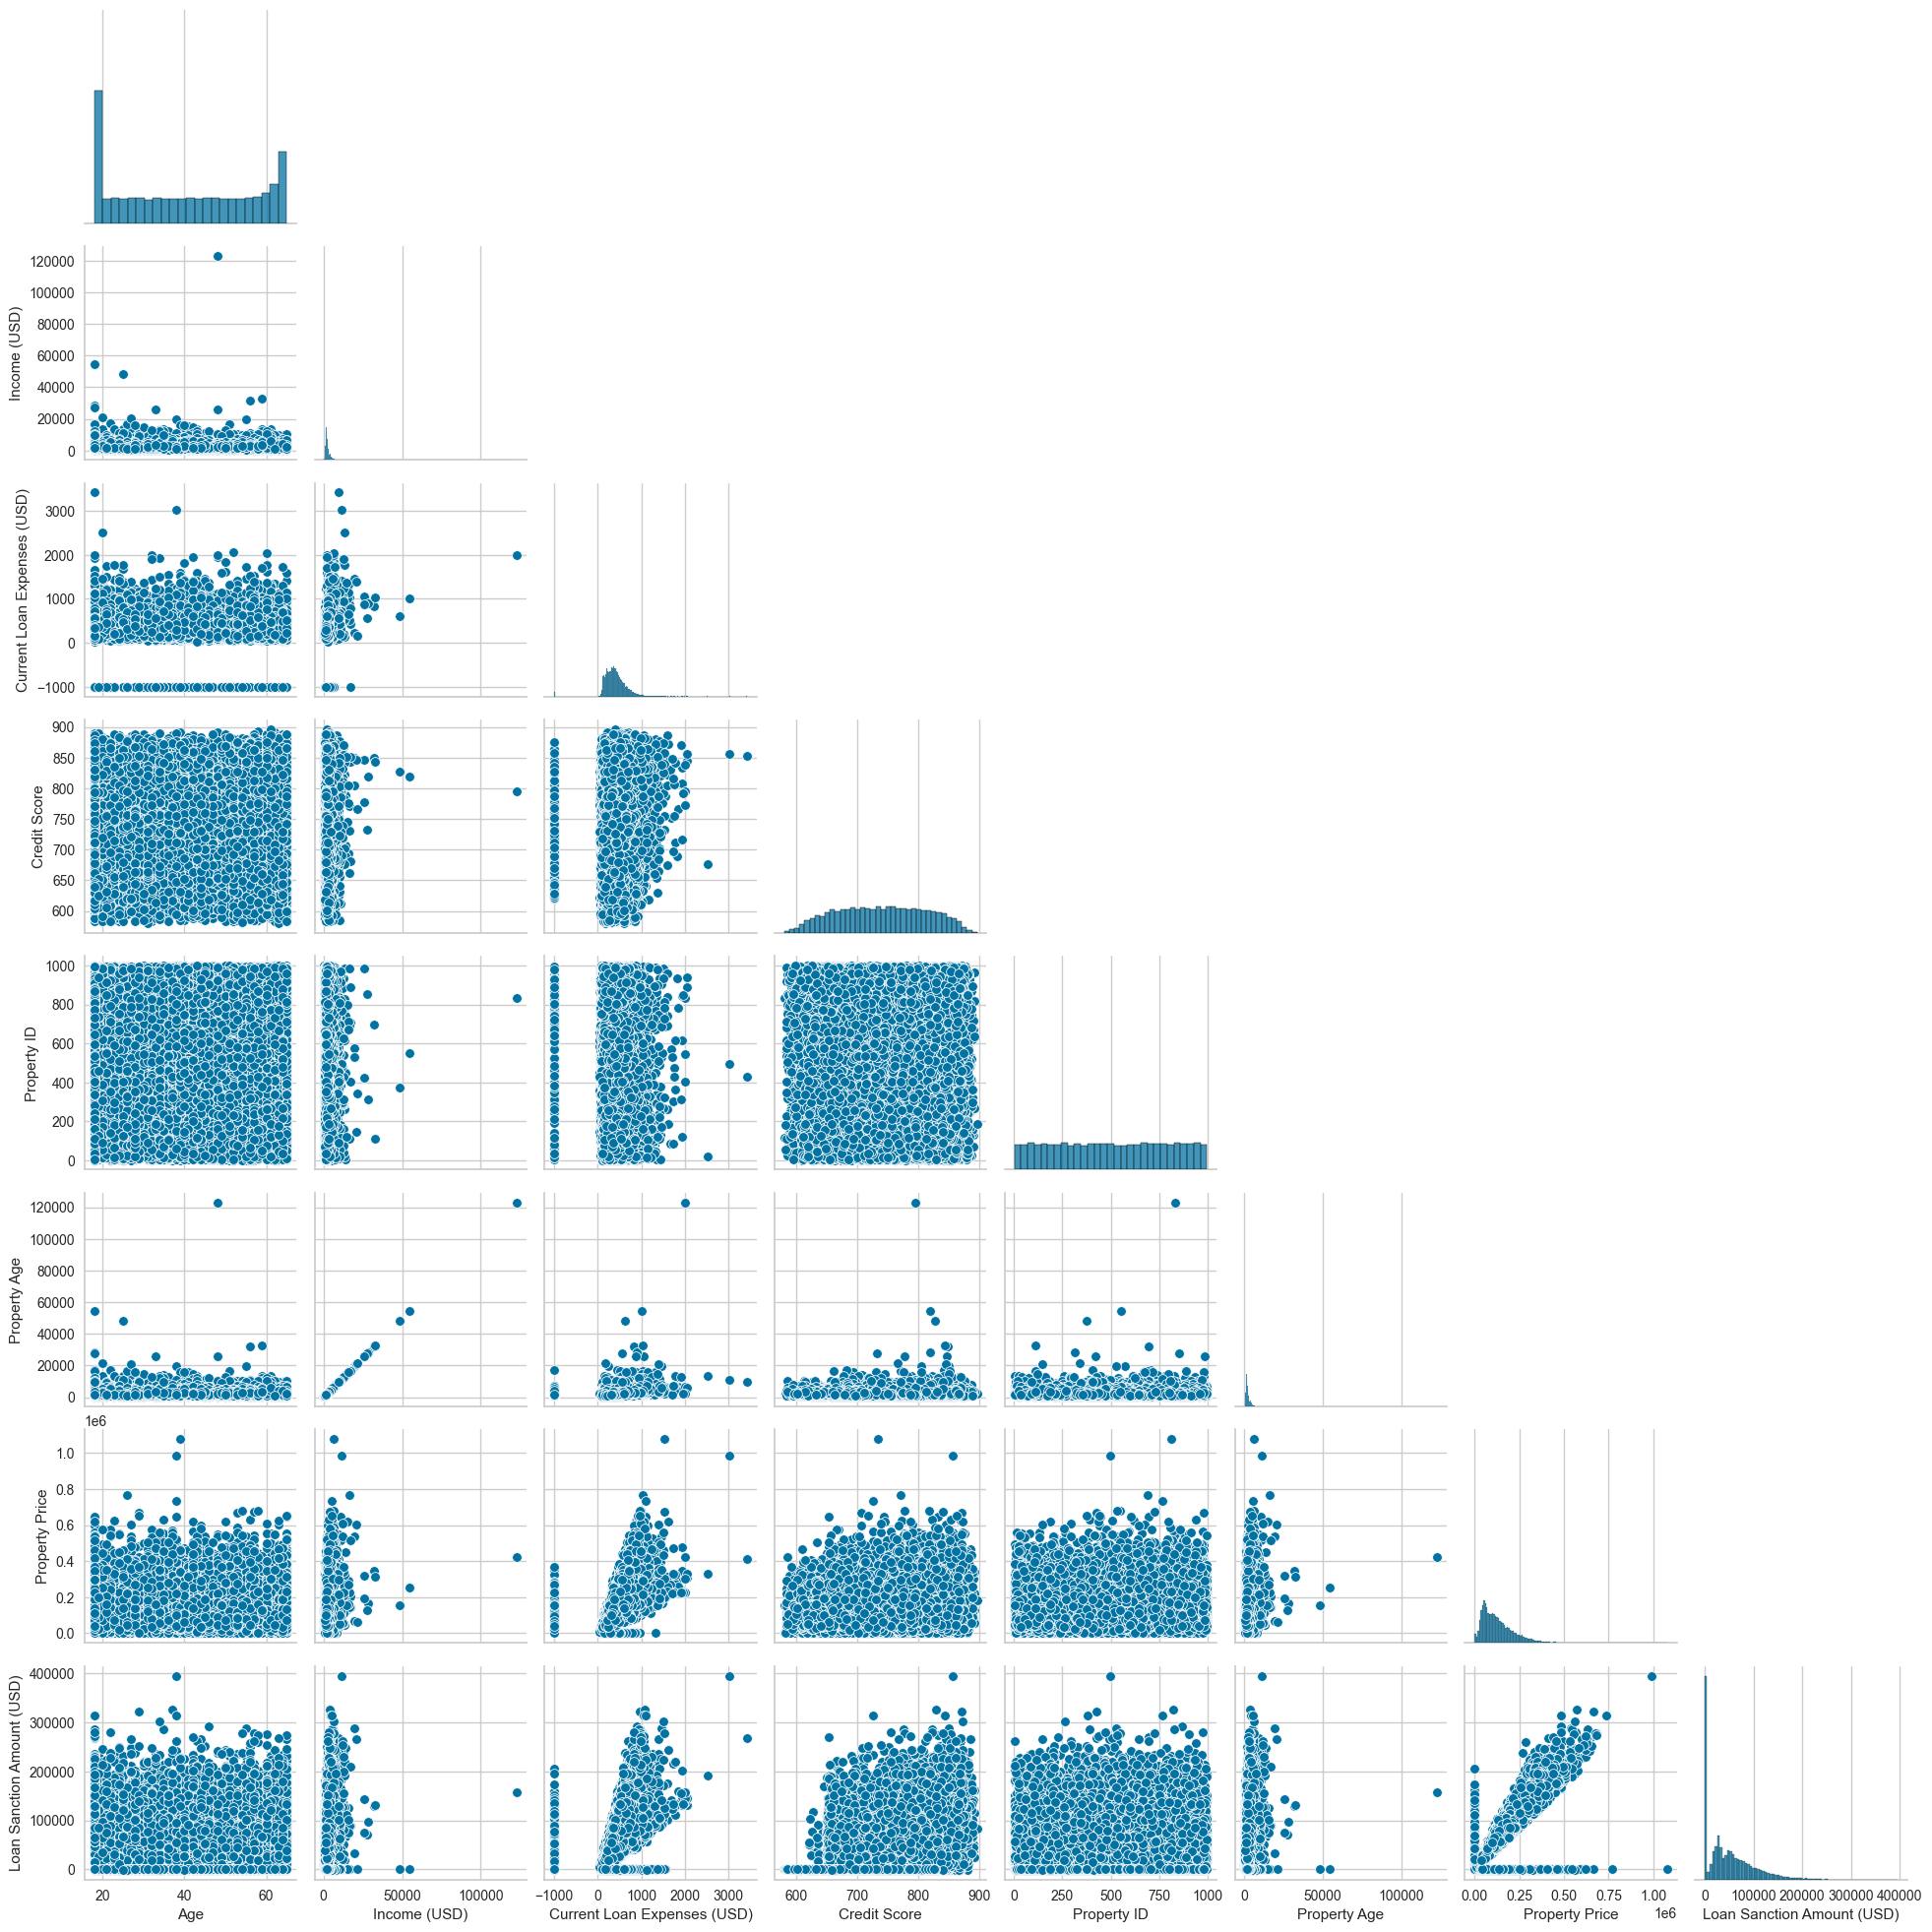

In [91]:
sns.pairplot(loan_amt_train_copy.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1),corner=True)
plt.show()

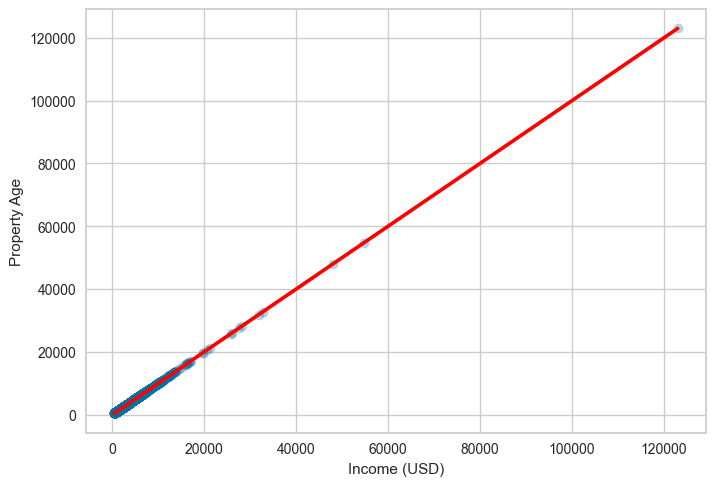

In [92]:
sns.regplot(x='Income (USD)',y='Property Age',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

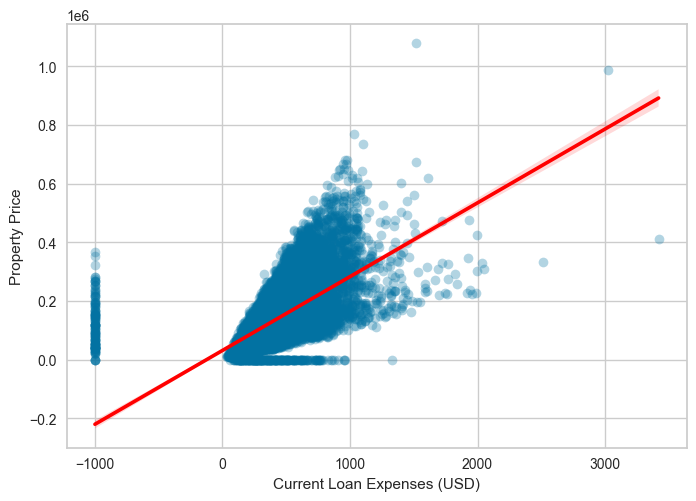

In [93]:
sns.regplot(x='Current Loan Expenses (USD)',y='Property Price',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

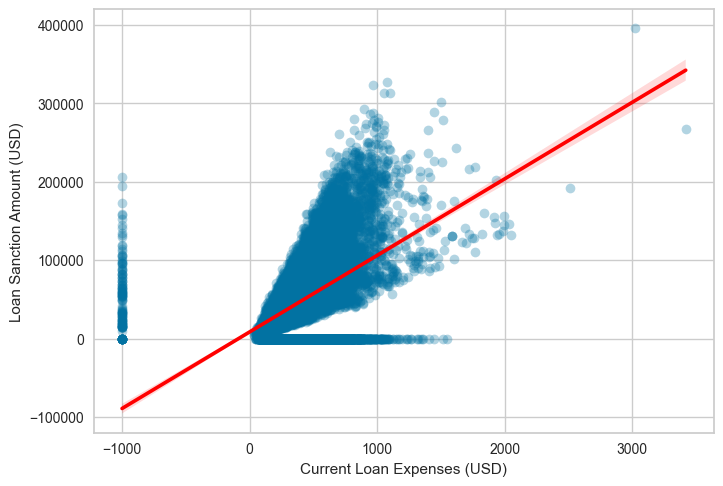

In [94]:
sns.regplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

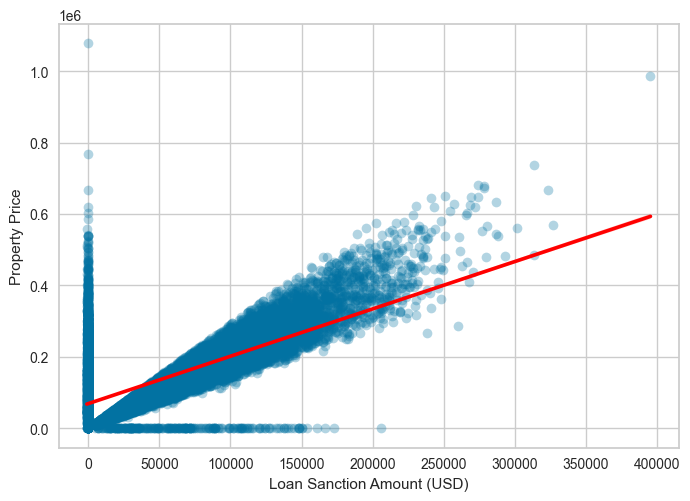

In [95]:
sns.regplot(x='Loan Sanction Amount (USD)',y='Property Price',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


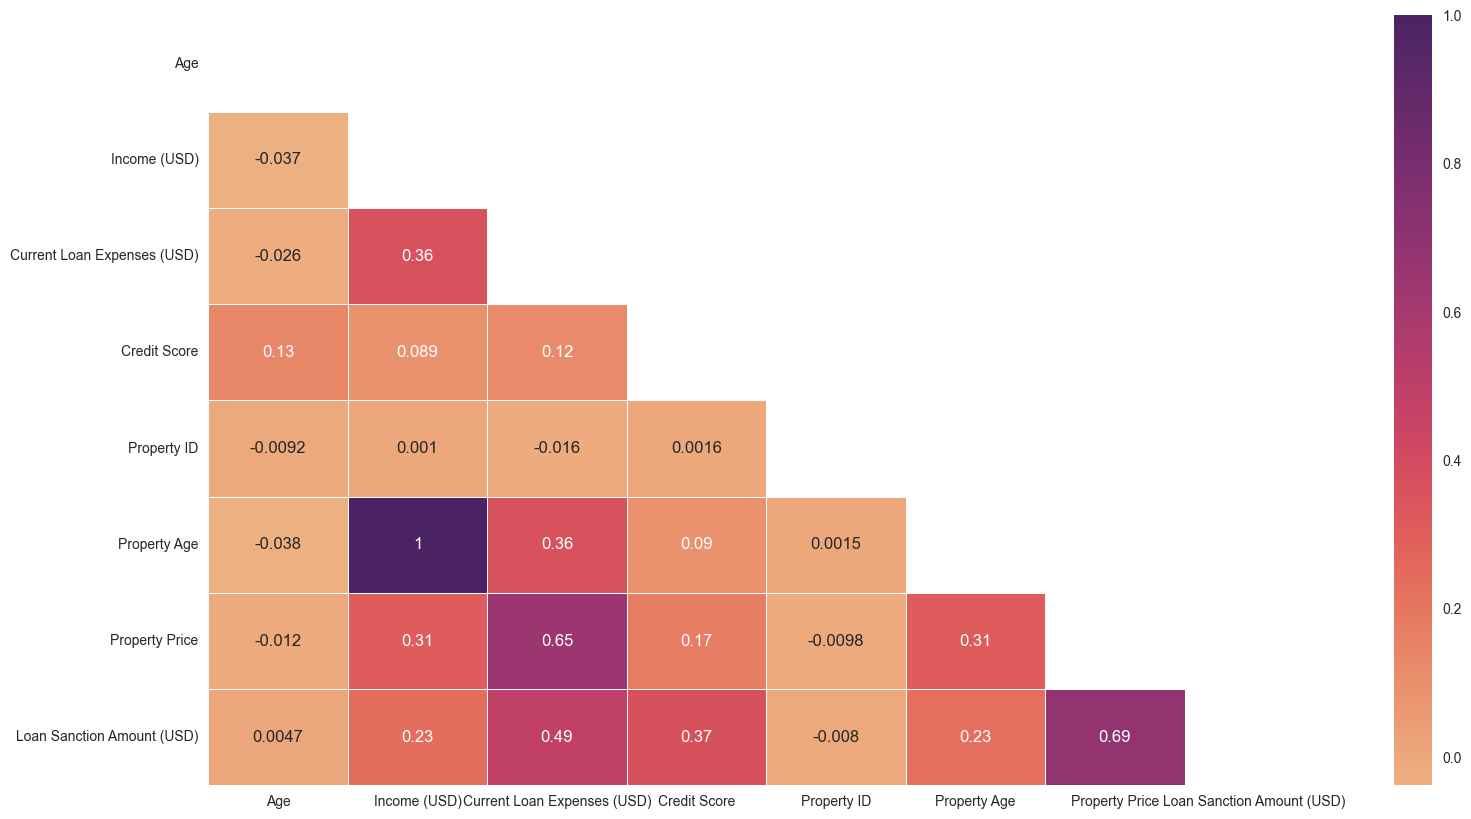

In [96]:
loan_amt_train_copy_corr = loan_amt_train_copy.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(loan_amt_train_copy_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(loan_amt_train_copy_corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

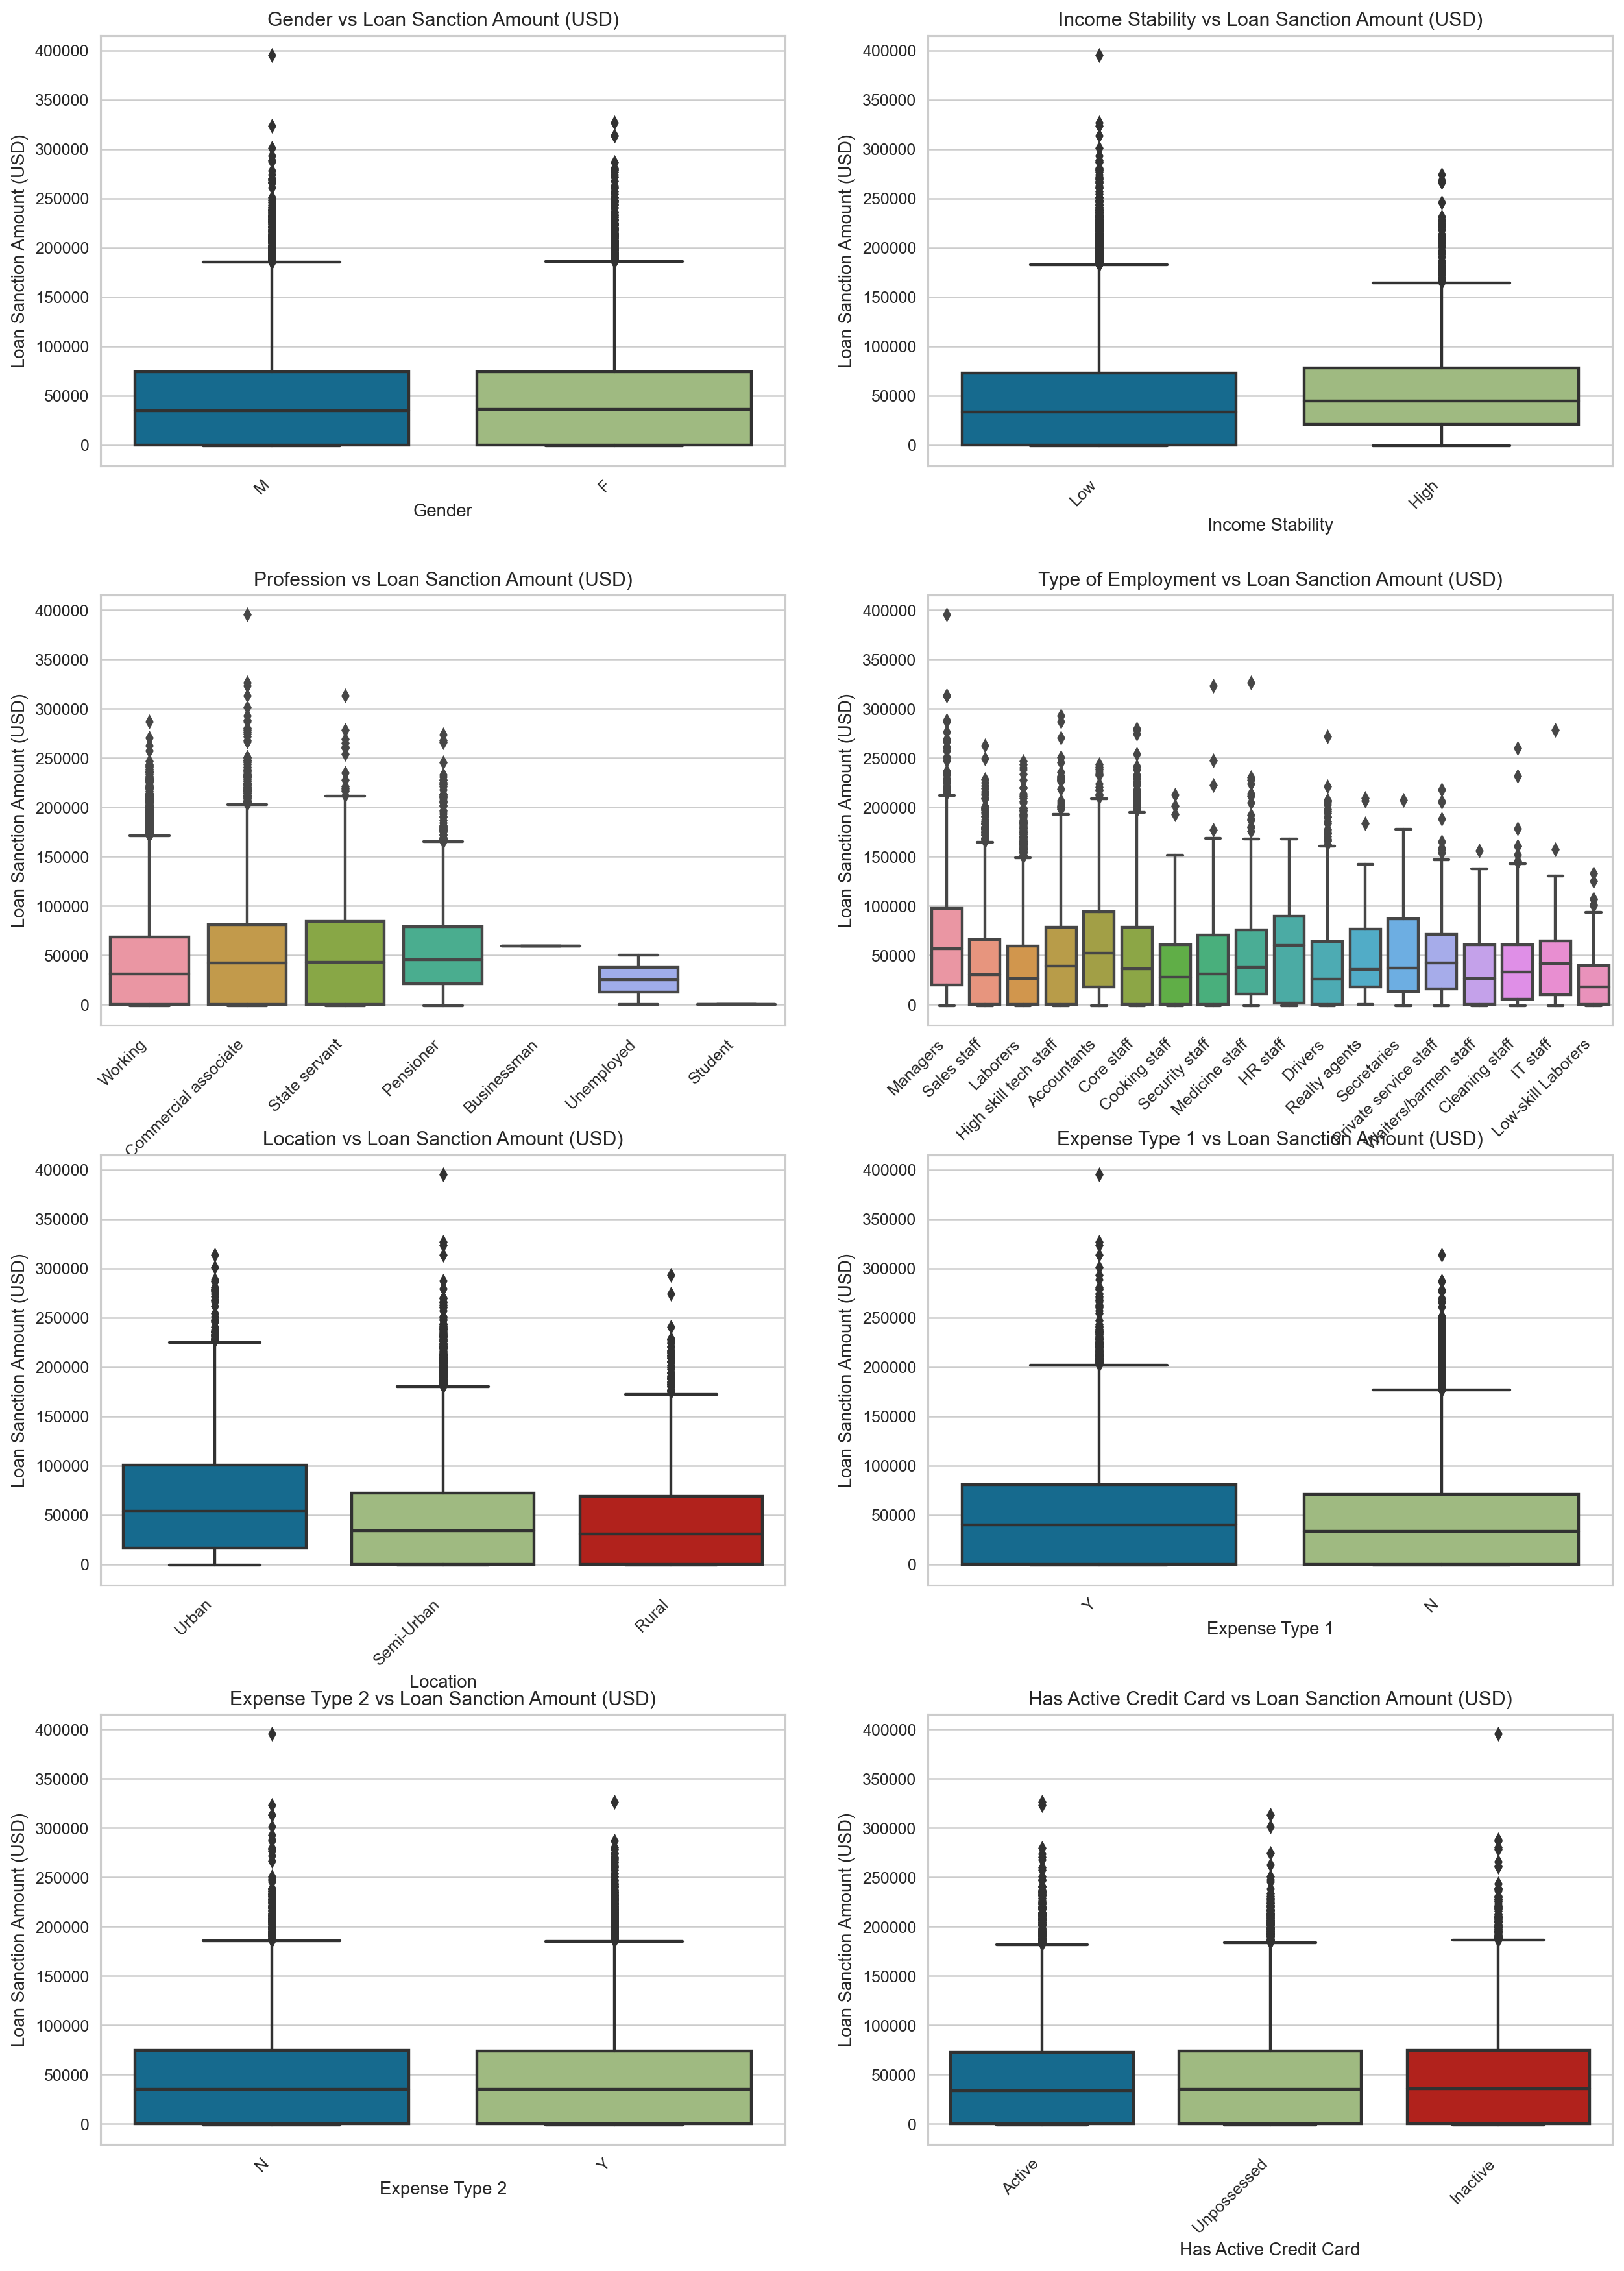

In [97]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=loan_amt_train_copy[cat_features[cat_ft_count]],y=loan_amt_train_copy['Loan Sanction Amount (USD)'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Loan Sanction Amount (USD)")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Loan Sanction Amount (USD)')
            cat_ft_count += 1
    break

# Transformations to be done on each feature
- Customer ID: Drop the feature
- Name: Drop the feature


In [98]:
class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Income (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Property Age', 'Property Price']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 1.5 * IQR)) | (df[self.feat_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [99]:
class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, mode_imputed_ft = ['Gender','Income Stability','Dependents','Has Active Credit Card','Property Location'], median_imputed_ft = ['Income (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age']):
        self.mode_imputed_ft = mode_imputed_ft
        self.median_imputed_ft = median_imputed_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.mode_imputed_ft + self.median_imputed_ft).issubset(df.columns)):
            # drop missing values in the target feature
            df.dropna(inplace=True, axis=0, subset=['Loan Sanction Amount (USD)'])
            # impute missing values with mode
            for ft in self.mode_imputed_ft:
                the_mode = df[ft].mode()[0]
                df[ft] = df[ft].fillna(the_mode)
            # impute missing values with median
            for ft in self.median_imputed_ft:
                the_median = df[ft].median()
                df[ft] = df[ft].fillna(the_median)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [100]:
class DropUncommonProfession(BaseEstimator, TransformerMixin):
    def __init__(self,profession_list = ['Student','Unemployed','Businessman']):
        self.profession_list = profession_list
    def fit(self,df):
        return self
    def transform(self,df):
        if ('Profession' in df.columns):
            # only keep the professions that are not in the profession_list
            df = df[~df['Profession'].isin(self.profession_list)]
            return df
        else:
            print("Profession feature is not in the dataframe")
            return df

In [101]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['Customer ID','Name','Type of Employment','Property ID']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [102]:
class ValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_999_val=['Co-Applicant', 'Current Loan Expenses (USD)', 'Loan Sanction Amount (USD)', 'Property Price']):
        self.feat_with_999_val = feat_with_999_val
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_999_val).issubset(df.columns)):
            for ft in self.feat_with_999_val:
                # replace any occurance of -999.000 with 0
                df[ft].replace(-999.000,0,inplace=True,regex=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [103]:
class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Property Price']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [104]:
class OneHotWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,one_hot_enc_ft = ['Gender', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Income Stability']):
        self.one_hot_enc_ft = one_hot_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.one_hot_enc_ft).issubset(df.columns)):
            # function to one hot encode the features in one_hot_enc_ft
            def one_hot_enc(df,one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # get the result of the one hot encoding columns names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # change the array of the one hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(),columns=feat_names_one_hot_enc,index=df.index)
                return df
            # function to concatenat the one hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df,one_hot_enc_df,one_hot_enc_ft):
                # get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # concatenate the rest of the features with the one hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]],axis=1)
                return df_concat
            # one hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df,self.one_hot_enc_ft)
            # returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df,one_hot_enc_df,self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe")
            return df

In [105]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_skewness=['Income (USD)','Loan Amount Request (USD)','Current Loan Expenses (USD)','Property Age']):
        self.col_with_skewness = col_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.col_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.col_with_skewness] = np.cbrt(df[self.col_with_skewness])
            return df
        else:
            print('One or more skewed columns are not found')
            return df

In [106]:
def full_pipeline(df):
    pipeline = Pipeline([
        ('outlier remover', OutlierImputer()),
        ('drop uncommon profession', DropUncommonProfession()),
        ('missing value imputer', MissingValueImputer()),
        ('drop features', DropFeatures()),
        ('-999 value imputer', ValueImputer()),
        ('skewness handler', SkewnessHandler()),
        ('min max scaler', MinMaxWithFeatNames()),
        ('one hot encoder', OneHotWithFeatNames())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [107]:

pd.options.mode.chained_assignment = None
loan_amt_train_copy_prep = full_pipeline(loan_amt_train_copy)

One or more skewed columns are not found
One or more features are not in the dataframe


In [108]:
loan_amt_train_copy_prep

Gender_F  Gender_M  Profession_Commercial associate  \
1         0.000     1.000                            0.000   
2         0.000     1.000                            1.000   
3         1.000     0.000                            0.000   
4         1.000     0.000                            0.000   
5         1.000     0.000                            0.000   
...         ...       ...                              ...   
23994     0.000     1.000                            0.000   
23995     1.000     0.000                            0.000   
23997     0.000     1.000                            0.000   
23998     1.000     0.000                            0.000   
23999     0.000     1.000                            0.000   

       Profession_Pensioner  Profession_State servant  Profession_Working  \
1                     0.000                     0.000               1.000   
2                     0.000                     0.000               0.000   
3                     0.000                     0.000               1.000   
4                     0.000                     0.000               1.000   
5                     0.000                     1.000               0.000   
...                     ...                       ...                 ...   
23994                 0.000                     0.000               1.000   
23995                 0.000                     0.000               1.000   
23997                 0.000                     0.000               1.000   
23998                 0.000                     0.000               1.000   
23999                 0.000                     0.000               1.000   

       Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
1               0.000                1.000           0.000             1.000   
2               0.000                1.000           0.000             1.000   
3               1.000                0.000           0.000             1.000   
4               0.000                1.000           0.000             1.000   
5               1.000                0.000           0.000             1.000   
...               ...                  ...             ...               ...   
23994           0.000                1.000           0.000             1.000   
23995           1.000                0.000           0.000             1.000   
23997           0.000                1.000           0.000             1.000   
23998           0.000                1.000           0.000             1.000   
23999           0.000                1.000           0.000             1.000   

       Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
1                 0.000             1.000             0.000   
2                 0.000             0.000             1.000   
3                 0.000             1.000             0.000   
4                 0.000             0.000             1.000   
5                 0.000             0.000             1.000   
...                 ...               ...               ...   
23994             0.000             0.000             1.000   
23995             0.000             0.000             1.000   
23997             0.000             0.000             1.000   
23998             0.000             0.000             1.000   
23999             0.000             0.000             1.000   

       Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
1                              1.000                            0.000   
2                              1.000                            0.000   
3                              0.000                            0.000   
4                              0.000                            1.000   
5                              0.000                            0.000   
...                              ...                              ...   
23994                          0.000                            0.000   
23995                          1.00

In [109]:
X_loan_amt_train_prep, y_loan_amt_train_prep = loan_amt_train_copy_prep.loc[:, loan_amt_train_copy_prep.columns != 'Loan Sanction Amount (USD)'], loan_amt_train_copy_prep['Loan Sanction Amount (USD)']


In [110]:
X_loan_amt_train_prep


Gender_F  Gender_M  Profession_Commercial associate  \
1         0.000     1.000                            0.000   
2         0.000     1.000                            1.000   
3         1.000     0.000                            0.000   
4         1.000     0.000                            0.000   
5         1.000     0.000                            0.000   
...         ...       ...                              ...   
23994     0.000     1.000                            0.000   
23995     1.000     0.000                            0.000   
23997     0.000     1.000                            0.000   
23998     1.000     0.000                            0.000   
23999     0.000     1.000                            0.000   

       Profession_Pensioner  Profession_State servant  Profession_Working  \
1                     0.000                     0.000               1.000   
2                     0.000                     0.000               0.000   
3                     0.000                     0.000               1.000   
4                     0.000                     0.000               1.000   
5                     0.000                     1.000               0.000   
...                     ...                       ...                 ...   
23994                 0.000                     0.000               1.000   
23995                 0.000                     0.000               1.000   
23997                 0.000                     0.000               1.000   
23998                 0.000                     0.000               1.000   
23999                 0.000                     0.000               1.000   

       Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
1               0.000                1.000           0.000             1.000   
2               0.000                1.000           0.000             1.000   
3               1.000                0.000           0.000             1.000   
4               0.000                1.000           0.000             1.000   
5               1.000                0.000           0.000             1.000   
...               ...                  ...             ...               ...   
23994           0.000                1.000           0.000             1.000   
23995           1.000                0.000           0.000             1.000   
23997           0.000                1.000           0.000             1.000   
23998           0.000                1.000           0.000             1.000   
23999           0.000                1.000           0.000             1.000   

       Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
1                 0.000             1.000             0.000   
2                 0.000             0.000             1.000   
3                 0.000             1.000             0.000   
4                 0.000             0.000             1.000   
5                 0.000             0.000             1.000   
...                 ...               ...               ...   
23994             0.000             0.000             1.000   
23995             0.000             0.000             1.000   
23997             0.000             0.000             1.000   
23998             0.000             0.000             1.000   
23999             0.000             0.000             1.000   

       Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
1                              1.000                            0.000   
2                              1.000                            0.000   
3                              0.000                            0.000   
4                              0.000                            1.000   
5                              0.000                            0.000   
...                              ...                              ...   
23994                          0.000                            0.000   
23995                          1.00

In [111]:
y_loan_amt_train_prep

1           0.000
2       72999.900
3           0.000
4       57256.530
5           0.000
           ...   
23994       0.000
23995   86005.110
23997   64283.520
23998   43445.680
23999   55597.380
Name: Loan Sanction Amount (USD), Length: 21560, dtype: float64

In [112]:
Regressors = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42),
}

In [123]:
def fit_score_model(model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep):
    rmse_scores_path = Path('saved_models/{0}/rmse_{0}'.format(model_name))
    try:
        #check if the file exists
        rmse_scores_path.resolve(strict=True)
    except FileNotFoundError:
        scores = cross_val_score(model, X_loan_amt_train_prep, y_loan_amt_train_prep, cv=3, scoring='neg_mean_squared_error')
        print(scores)
        rmse_scores = np.sqrt(-scores)
        print('Score: {}'.format(rmse_scores))
        print('Mean score: {}'.format(rmse_scores.mean()))
        print('Standard deviation: {}'.format(rmse_scores.std()))
        joblib.dump(rmse_scores, 'saved_models/{0}/rmse_{0}'.format(model_name))
    else:
        rmse_scores = joblib.load('saved_models/{0}/rmse_{0}'.format(model_name))
        print('Score: {}'.format(rmse_scores))
        print('Mean score: {}'.format(rmse_scores.mean()))
        print('Standard deviation: {}'.format(rmse_scores.std()))

In [124]:
def folder_check_model(model_name):
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{}/'.format(model_name)):
        os.makedirs('saved_models/{}/'.format(model_name))

In [125]:
# loop over all the models
for model_name, model in Regressors.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    # check if the folder for saving the model exists, if not create it
    folder_check_model(model_name)
    # fit and score the model
    fit_score_model(model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)





----------------------  Linear Regression  ----------------------


Score: [27773.5317811  28005.49612394 27048.66025944]
Mean score: 27609.22938815996
Standard deviation: 407.5374626040969




----------------------  KNN Regression  ----------------------


Score: [33846.92250219 34732.89631791 33059.98541714]
Mean score: 33879.934745743805
Standard deviation: 683.3618254127691




----------------------  Decision Tree Regression  ----------------------


Score: [31774.57163469 31295.18130267 31779.01869386]
Mean score: 31616.25721040679
Standard deviation: 227.04221043786995




----------------------  Random Forest Regression  ----------------------


Score: [22798.40843659 23272.78975864 22375.46837967]
Mean score: 22815.555524969986
Standard deviation: 366.53051830026726




----------------------  Gradient Boosting Regression  ----------------------


Score: [22678.32031222 23166.28552396 22282.56395008]
Mean score: 22709.056595422964
Standard deviation: 361.43186943309894


